In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib
from scipy.stats import t
from scipy.optimize import curve_fit

from panda.interface import *
import panda.interface
from panda.profile_approx import profile_approx, profile_approx_from_array
from panda.density_profile import get_density_profile
import time
from tqdm import tqdm
from scipy import stats
# from src.utils_py.stat_ineff import get_statistical_inefficiency
# from src.utils_py.angle_blocks import get_angle_blocks

cmap = matplotlib.colormaps['tab10']
# plt.rcParams['font.family'] = 'Helvetica'

In [2]:
# Load Helvetica font from file
root = os.environ['HOME']
font_path = f"{root}/HelveticaNeue.ttc"  # Update this path
helvetica_font = fm.FontProperties(fname=font_path)

---

In [4]:
T = 40_000
dT = 5_000
step = 2_500

In [5]:
scale = '2.0'
path = os.path.join('../data', f'dens_{scale}')

In [ ]:
angles_1 = []
time_1 = []

for t_end in range(dT, T+1, step):
    t_start = t_end - dT

    folder = os.path.join(path, f'dens_{t_end}')
    H = 9
    l, phi = 18.004 / H, 0.5

    z, dens, best = profile_approx(
        dens_profile_file=os.path.join(folder, 'dens.xvg'),
        rho_bulk=3.0896 * 10,
        l=l,
        phi=phi,
        H=H,
        interface_type='roll'
    )

    angles_1.append(np.rad2deg(best['theta']))
    time_1.append(t_end)

    print('Time {}; Theta: {:.2f}'.format(t_end, np.rad2deg(best['theta'])))
    print('Real phi {:.3f}'.format(np.trapz(dens, z)))

    plt.figure(figsize=(8, 6))

    plt.grid(alpha=0.5)
    plt.plot(
        z, dens,
        label='decane',
        color='#FF8000',
        linewidth=2
    )

    plt.plot(
        z, rho_roll_theta(z, l, phi, best['theta']),
        label=r'approximation with $\theta$ = {:.1f}$^\circ$C'.format(np.rad2deg(best["theta"])),
        # color='#00B400',
        color='#D2001B',
        linewidth=2.5,
        linestyle='dashed'
    )

    plt.title(f'Theta at time: {t_end} ps', fontsize=18)
    # plt.xlim(-0.9, 0.9)
    # plt.ylim(-0.75, 0.75)
    plt.xlabel('z', fontsize=14)
    plt.ylabel(r'$\rho / \rho_{bulk}$', fontsize=14)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.legend(loc='lower center', fontsize=14)
    plt.ylim(bottom=-0.1)
    plt.show()

In [ ]:
angles_2 = []
time_2 = []

for t_end in range(dT, T+1, step):
    t_start = t_end - dT

    folder = os.path.join(path, f'dens_{t_end}')

    z, dens, l, phi, H, best = profile_approx_modified(
        structure_file=os.path.join(folder, f'dump_{t_end}.gro'),
        dens_profile_file=os.path.join(folder, 'dens.xvg'),
        rho_bulk=3.0896 * 10,
        droplet_mols=['DECAN'],
        interface_type='roll'
    )

    angles_2.append(np.rad2deg(best['theta']))
    time_2.append(t_end)

    print('Time {}; Theta: {:.2f}; Offset: {:.2f}'.format(t_end, np.rad2deg(best['theta']), best['offset']))
    print('Real phi {:.3f}'.format(np.trapz(dens, z)))

    plt.figure(figsize=(8, 6))
    # fig, ax = plt.subplots(1, 3, figsize=(16, 6))


    plt.grid(alpha=0.5)
    plt.plot(
        z, dens,
        label='decane',
        color='#FF8000',
        linewidth=2
    )

    plt.plot(
        z, rho_roll_theta(z, l, phi, best['theta']) + best['offset'],
        label=r'approximation with $\theta$ = {:.1f}$^\circ$C'.format(np.rad2deg(best["theta"])),
        # color='#00B400',
        color='#D2001B',
        linewidth=2.5,
        linestyle='dashed'
    )

    # plt.xlim(-0.9, 0.9)
    # plt.ylim(-0.75, 0.75)
    plt.title(f'Modified at time: {t_end} ps', fontsize=18)
    plt.xlabel('z', fontsize=14)
    plt.ylabel(r'$\rho / \rho_{bulk}$', fontsize=14)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.legend(loc='lower center', fontsize=14)
    plt.ylim(bottom=-0.1)
    plt.show()

In [ ]:
angles_3 = []
time_3 = []

for t_end in range(dT, T+1, step):
    t_start = t_end - dT

    folder = os.path.join(path, f'dens_{t_end}')
    H = 9
    l, phi = 18.004 / H, 0.5

    z, dens, best = profile_approx_alpha(
        dens_profile_file=os.path.join(folder, 'dens.xvg'),
        rho_bulk=3.0896 * 10,
        l=l,
        phi=phi,
        H=H,
        interface_type='roll'
    )

    angles_3.append(np.rad2deg(best['theta']))
    time_3.append(t_end)

    print('Time {}; Theta: {:.2f}: Delta: {:.2e}'.format(t_end, np.rad2deg(best['theta']), best['delta']))
    print('Real phi {:.3f}'.format(np.trapz(dens, z)))

    plt.figure(figsize=(8, 6))

    plt.grid(alpha=0.5)
    plt.plot(
        z, dens,
        label='decane',
        color='#FF8000',
        linewidth=2
    )

    plt.plot(
        z, rho_roll_alpha(z, l, phi, best['theta'], best['delta']),
        label=r'approximation with $\theta$ = {:.1f}$^\circ$C'.format(np.rad2deg(best["theta"])),
        # color='#00B400',
        color='#D2001B',
        linewidth=2.5,
        linestyle='dashed'
    )

    plt.title(f'Alpha at time: {t_end} ps', fontsize=18)
    # plt.xlim(-0.9, 0.9)
    # plt.ylim(-0.75, 0.75)
    plt.xlabel('z', fontsize=14)
    plt.ylabel(r'$\rho / \rho_{bulk}$', fontsize=14)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.legend(loc='lower center', fontsize=14)
    plt.ylim(bottom=-0.1)
    plt.show()

131.2227223419788


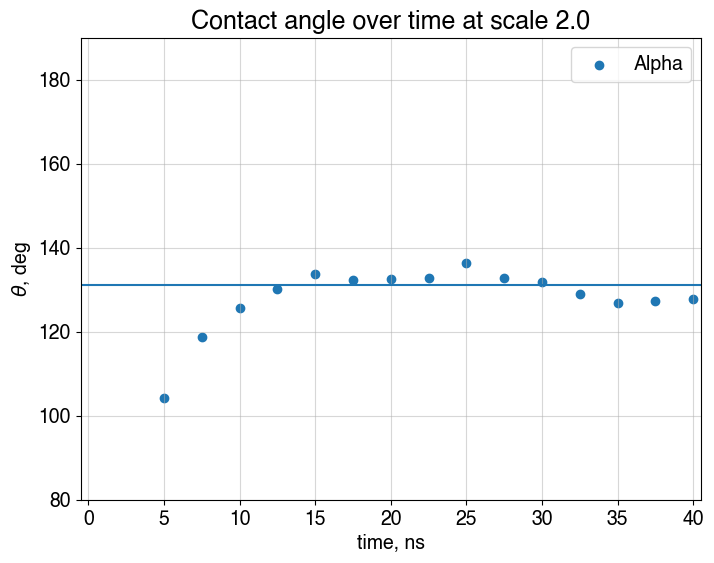

In [102]:
plt.figure(figsize=(8, 6))
plt.grid(alpha=0.5)

# plt.scatter(np.array(time_1) * 1e-3, angles_1, label='Theta')
# plt.scatter(np.array(time_2) * 1e-3, angles_2, label='Modified')
plt.scatter(np.array(time_3) * 1e-3, angles_3, label='Alpha')

begin = 4
plt.hlines(np.mean(angles_3[begin:]), -0.5, 40.5)
print(np.mean(angles_3[begin:]))

plt.title(f'Contact angle over time at scale {scale}', fontsize=18)
plt.xlim(-0.5, 40.5)
plt.ylim(80, 190)
plt.xlabel('time, ns', fontsize=14)
plt.ylabel(r'$\theta$, deg', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='best', fontsize=14)
plt.show()

---

## Different scaling

In [142]:
angles_scale = []
time_scale = []

T = 40_000
dT = 5_000
scales = [2.0, 2.1, 2.2, 2.3, 2.4, 2.5]
step = 2_500


for i, sc in enumerate(scales):
    angles_scale.append([])
    time_scale.append([])

    path = os.path.join('../data', f'dens_{sc}')

    for t_end in range(dT, T+1, step):
        t_start = t_end - dT

        folder = os.path.join(path, f'dens_{t_end}')
        H = 9
        l, phi = 18.004 / H, 0.5

        z, dens, best = profile_approx_alpha(
            dens_profile_file=os.path.join(folder, 'dens.xvg'),
            rho_bulk=3.0896 * 10,
            l=l,
            phi=phi,
            H=H,
            interface_type='roll',
            display=False
        )

        angles_scale[i].append(np.rad2deg(best['theta']))
        time_scale[i].append(t_end)

        print('Time {}; Theta: {:.2f}: Delta: {:.2f}'.format(t_end, np.rad2deg(best['theta']), best['theta']))
        print('Real phi {:.3f}'.format(np.trapz(dens, z)))


Time 5000; Theta: 104.17: Delta: 1.82
Real phi 0.500
Time 7500; Theta: 118.72: Delta: 2.07
Real phi 0.500
Time 10000; Theta: 125.66: Delta: 2.19
Real phi 0.500
Time 12500; Theta: 130.24: Delta: 2.27
Real phi 0.500
Time 15000; Theta: 133.82: Delta: 2.34
Real phi 0.500
Time 17500; Theta: 132.34: Delta: 2.31
Real phi 0.500
Time 20000; Theta: 132.66: Delta: 2.32
Real phi 0.500
Time 22500; Theta: 132.72: Delta: 2.32
Real phi 0.500
Time 25000; Theta: 136.30: Delta: 2.38
Real phi 0.500
Time 27500; Theta: 132.71: Delta: 2.32
Real phi 0.500
Time 30000; Theta: 131.93: Delta: 2.30
Real phi 0.500
Time 32500; Theta: 129.03: Delta: 2.25
Real phi 0.500
Time 35000; Theta: 126.86: Delta: 2.21
Real phi 0.500
Time 37500; Theta: 127.30: Delta: 2.22
Real phi 0.500
Time 40000; Theta: 127.79: Delta: 2.23
Real phi 0.500
Time 5000; Theta: 104.08: Delta: 1.82
Real phi 0.500
Time 7500; Theta: 114.28: Delta: 1.99
Real phi 0.500
Time 10000; Theta: 118.82: Delta: 2.07
Real phi 0.500
Time 12500; Theta: 122.10: Delta

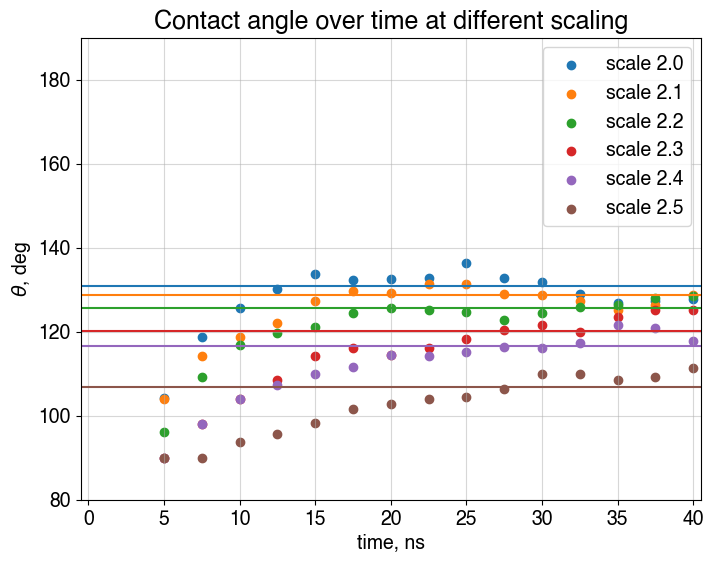

In [162]:
cmap = matplotlib.colormaps['tab10']
mean_angles = []
std_angles = []

plt.figure(figsize=(8, 6))
plt.grid(alpha=0.5)

begin = 5
for i, sc, angle, time in zip(range(len(scales)), scales, angles_scale, time_scale):
    mean_angle = np.mean(angle[begin:])
    std = np.std(angle[begin:])
    mean_angles.append(mean_angle)
    std_angles.append(std)
    # plt.scatter(np.array(time) * 1e-3, angle, label=f'scale {sc}\nangle {mean_angle:.1f} ± {std:.1f}')
    plt.scatter(np.array(time) * 1e-3, angle, label=f'scale {sc}')
    plt.hlines(mean_angle, -0.5, 40.5, colors=cmap(i))

plt.title('Contact angle over time at different scaling', fontsize=18)
plt.xlim(-0.5, 40.5)
plt.ylim(80, 190)
plt.xlabel('time, ns', fontsize=14)
plt.ylabel(r'$\theta$, deg', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='best', fontsize=14)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


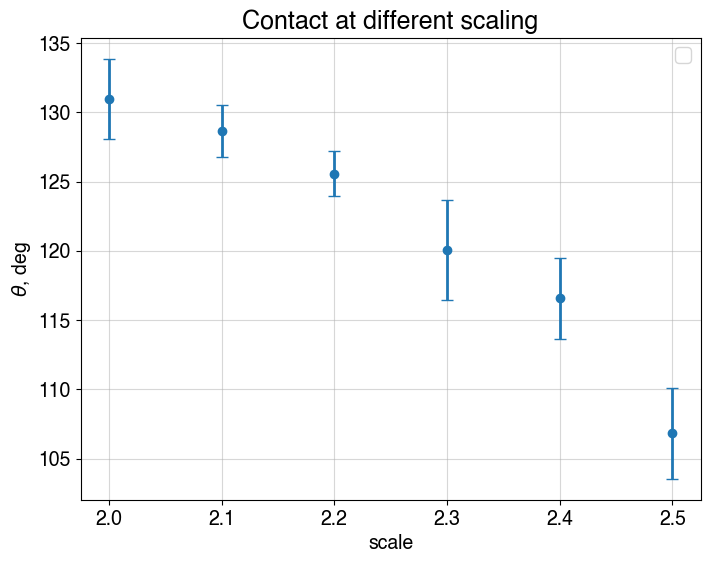

In [166]:
cmap = matplotlib.colormaps['tab10']

plt.figure(figsize=(8, 6))
plt.grid(alpha=0.5)

plt.errorbar(scales, mean_angles, std_angles, elinewidth=2, capsize=4, fmt='o')

plt.title('Contact at different scaling', fontsize=18)
# plt.xlim(-0.5, 40.5)
# plt.ylim(80, 190)
plt.xlabel('scale', fontsize=14)
plt.ylabel(r'$\theta$, deg', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='best', fontsize=14)
plt.show()

In [ ]:
"{:.2e}".format(Cij['C12'])

'9.19e-06'

---

## Different averaging time

In [63]:
T = 20_000
dT = 4_000
step = 1_000

scale = '2.0'
path = os.path.join('../data', f'dens_{scale}_ave_{dT}')

In [ ]:
T = 20_000
dT = 5_000

scale = '2.0'
path = os.path.join('../data', f'dens_{scale}_ave_{dT}')

for t_end in range(dT, T+1, dT):
    t_start = t_end - dT

    folder = os.path.join(path, f'dens_{t_end}')
    H = 9
    l, phi = 18.004 / H, 0.5

    z, dens, best = profile_approx_alpha(
        dens_profile_file=os.path.join(folder, 'dens.xvg'),
        rho_bulk=3.0896 * 10,
        l=l,
        phi=phi,
        H=H,
        interface_type='roll'
    )

    print('Time {}; Theta: {:.2f}: Delta: {:.2f}'.format(t_end, np.rad2deg(best['theta']), best['theta']))
    print('Real phi {:.3f}'.format(np.trapz(dens, z)))

    plt.figure(figsize=(8, 6))

    plt.grid(alpha=0.5)
    plt.plot(
        z, dens,
        label='decane',
        color='#FF8000',
        linewidth=2
    )

    plt.plot(
        z, rho_roll_alpha(z, l, phi, best['theta'], best['delta']),
        label=r'approximation with $\theta$ = {:.1f}$^\circ$C'.format(np.rad2deg(best["theta"])),
        # color='#00B400',
        color='#D2001B',
        linewidth=2.5,
        linestyle='dashed'
    )

    plt.title(f'Alpha at time: {t_end} ps', fontsize=18)
    # plt.xlim(-0.9, 0.9)
    # plt.ylim(-0.75, 0.75)
    plt.xlabel('z', fontsize=14)
    plt.ylabel(r'$\rho / \rho_{bulk}$', fontsize=14)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.legend(loc='lower center', fontsize=14)
    plt.ylim(bottom=-0.1)
    plt.show()

In [76]:
angles_ave = []
time_ave = []

T = 20_000
dT = [5_000, 4_000, 3_000, 2_000]
step = 1_000

scale = '2.0'
for i, dt in enumerate(dT):
    angles_ave.append([])
    time_ave.append([])

    path = os.path.join('../data', f'dens_{scale}_ave_{dt}')

    for t_end in range(dt, T+1, step):
        t_start = t_end - dt

        folder = os.path.join(path, f'dens_{t_end}')
        H = 9
        l, phi = 18.004 / H, 0.5

        z, dens, best = profile_approx_alpha(
            dens_profile_file=os.path.join(folder, 'dens.xvg'),
            rho_bulk=3.0896 * 10,
            l=l,
            phi=phi,
            H=H,
            interface_type='roll'
        )

        angles_ave[i].append(np.rad2deg(best['theta']))
        time_ave[i].append(t_end)

        print('Time {}; Theta: {:.2f}: Delta: {:.2f}'.format(t_end, np.rad2deg(best['theta']), best['theta']))
        print('Real phi {:.3f}'.format(np.trapz(dens, z)))


Optimization terminated successfully.
         Current function value: 2.513917
         Iterations: 27
         Function evaluations: 50
Time 5000; Theta: 131.62: Delta: 2.30
Real phi 0.500
Optimization terminated successfully.
         Current function value: 1.393121
         Iterations: 34
         Function evaluations: 66
Time 6000; Theta: 133.83: Delta: 2.34
Real phi 0.500
Optimization terminated successfully.
         Current function value: 1.680674
         Iterations: 36
         Function evaluations: 71
Time 7000; Theta: 132.77: Delta: 2.32
Real phi 0.500
Optimization terminated successfully.
         Current function value: 1.986159
         Iterations: 44
         Function evaluations: 80
Time 8000; Theta: 131.43: Delta: 2.29
Real phi 0.500
Optimization terminated successfully.
         Current function value: 2.112200
         Iterations: 51
         Function evaluations: 95
Time 9000; Theta: 132.07: Delta: 2.30
Real phi 0.500
Optimization terminated successfully.
       

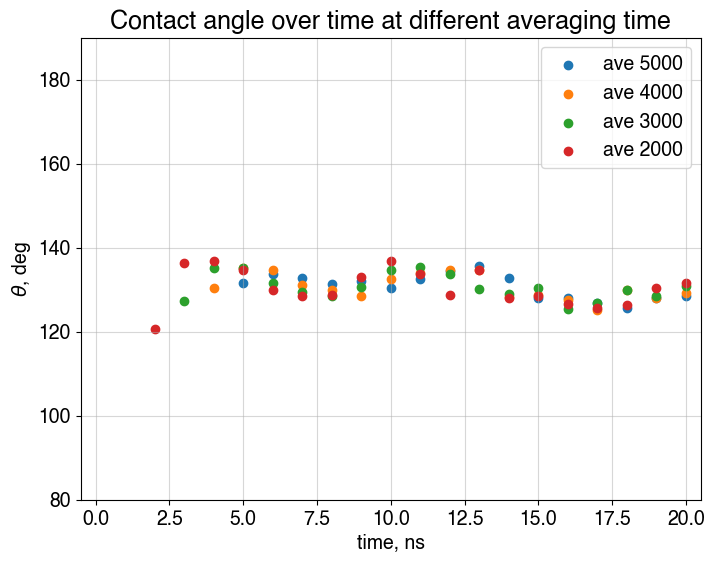

In [77]:
plt.figure(figsize=(8, 6))
plt.grid(alpha=0.5)

for dt, angle, time in zip(dT, angles_ave, time_ave):
    plt.scatter(np.array(time) * 1e-3, angle, label=f'ave {dt}')

plt.title('Contact angle over time at different averaging time', fontsize=18)
plt.xlim(-0.5, 20.5)
plt.ylim(80, 190)
plt.xlabel('time, ns', fontsize=14)
plt.ylabel(r'$\theta$, deg', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='best', fontsize=14)
plt.show()

---

## Verifing pot en, stat ineff and caclulate angles over time

In [88]:
folder = "/home/fluffymelon/PANDA_exp/scaling/production/calcite_decane_tip4p_sc_1.6_offset_0.2"

In [89]:
t, en = np.loadtxt(os.path.join(folder, "energy.xvg"), comments=["@", "#"], unpack=True)

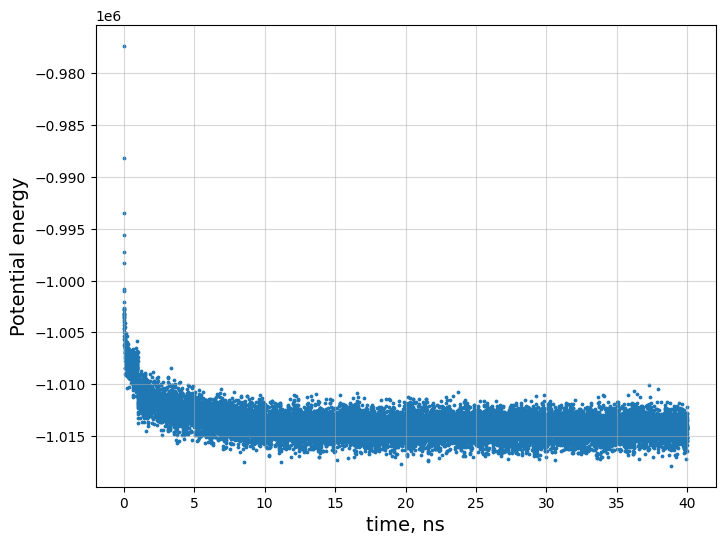

In [90]:
# Plot the result
plt.figure(figsize=(8, 6))
plt.grid(alpha=0.5)

plt.scatter(t / 1_000, en, s=3)

plt.xlabel('time, ns', fontsize=14)
plt.ylabel('Potential energy', fontsize=14)

plt.show()

In [45]:
args = {
    "trajectory_file": os.path.join(folder, 'cal_dec_tip4p.xtc'),
    "topology_file": os.path.join(folder, 'cal_dec_tip4p.gro'),
    "residue": 'DECAN',
    "H": 9,
    "l": 18.004 / 9,
    "phi": 0.5,
    "rho_bulk": 3.0896 * 10,
    "interface_type": 'roll',
    "sl": 200,
    "chunk_length": 1_000,
    "begin_time": 10_000,
    "time": 40_000,
    "timestep": 2,
    "max_block_length": 5_000,
    "units": 'ps',
    "reverse": True,
    "display": False,
}

block_sizes, si = get_statistical_inefficiency(**args)

Calculating all density profiles


Chunk: 100%|██████████| 30/30 [03:48<00:00,  7.60s/it]


Calculating contact angles


100%|██████████| 15000/15000 [02:46<00:00, 89.83it/s] 


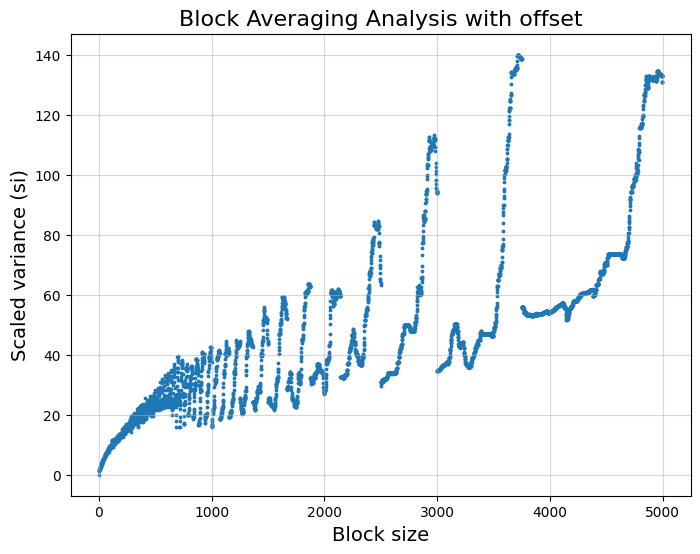

In [48]:
# Plot the result
plt.figure(figsize=(8, 6))
plt.grid(alpha=0.5)

plt.scatter(block_sizes, si, s=3)

plt.xlabel('Block size', fontsize=14)
plt.ylabel('Scaled variance (si)', fontsize=14)
plt.title('Block Averaging Analysis with offset', fontsize=16)

plt.show()

In [9]:
args = {
    "trajectory_file": os.path.join(folder, 'cal_dec_tip4p.xtc'),
    "topology_file": os.path.join(folder, 'cal_dec_tip4p.gro'),
    "residue": 'DECAN',
    "H": 9,
    "l": 18.004 / 9,
    "phi": 0.5,
    "rho_bulk": 3.0896 * 10,
    "interface_type": 'roll',
    "sl": 200,
    "block_length": 4_000,
    "begin_time": 0,
    "time": 40_000,
    "timestep": 2,
    "units": 'ps',
    "display": False,
}

time, angles = get_angle_blocks(**args)

Chunk:   0%|          | 0/10 [00:00<?, ?it/s]

Chunk: 100%|██████████| 10/10 [04:12<00:00, 25.22s/it]


135.36±1.69


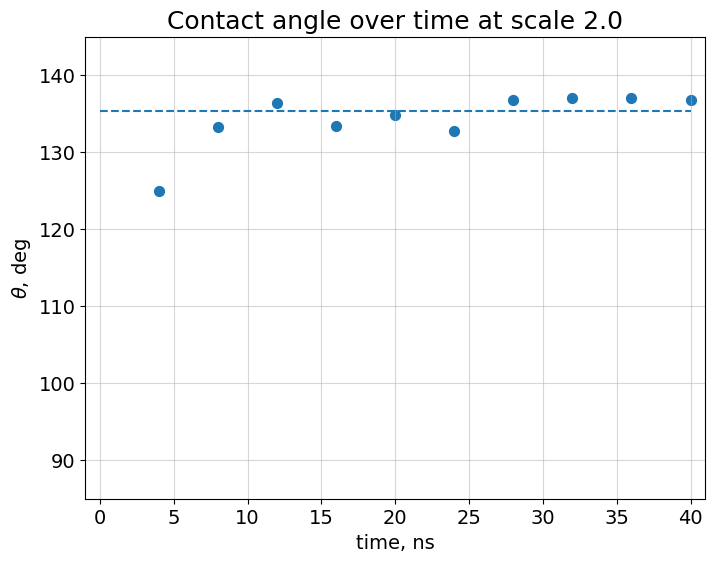

In [47]:
plt.figure(figsize=(8, 6))
plt.grid(alpha=0.5)

s = 50

begin = 1
mean = np.mean(angles[begin:])
std = np.std(angles[begin:])
print("{:.2f}±{:.2f}".format(mean, std))
plt.scatter(time / 1_000, angles, s=s, color=cmap(0))
plt.hlines(mean, 0, 40, color=cmap(0), linestyles="--")

plt.title(f'Contact angle over time at scale 2.0', fontsize=18)
plt.xlim(-1, 41)
plt.ylim(85, 145)
plt.xlabel('time, ns', fontsize=14)
plt.ylabel(r'$\theta$, deg', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# plt.legend(loc='lower right', fontsize=14)

plt.show()

---

## Reading data from files

In [47]:
folder = "/home/fluffymelon/PANDA_exp/scaling/production/calcite_decane_tip4p_sc_3.0_offset_0.2"

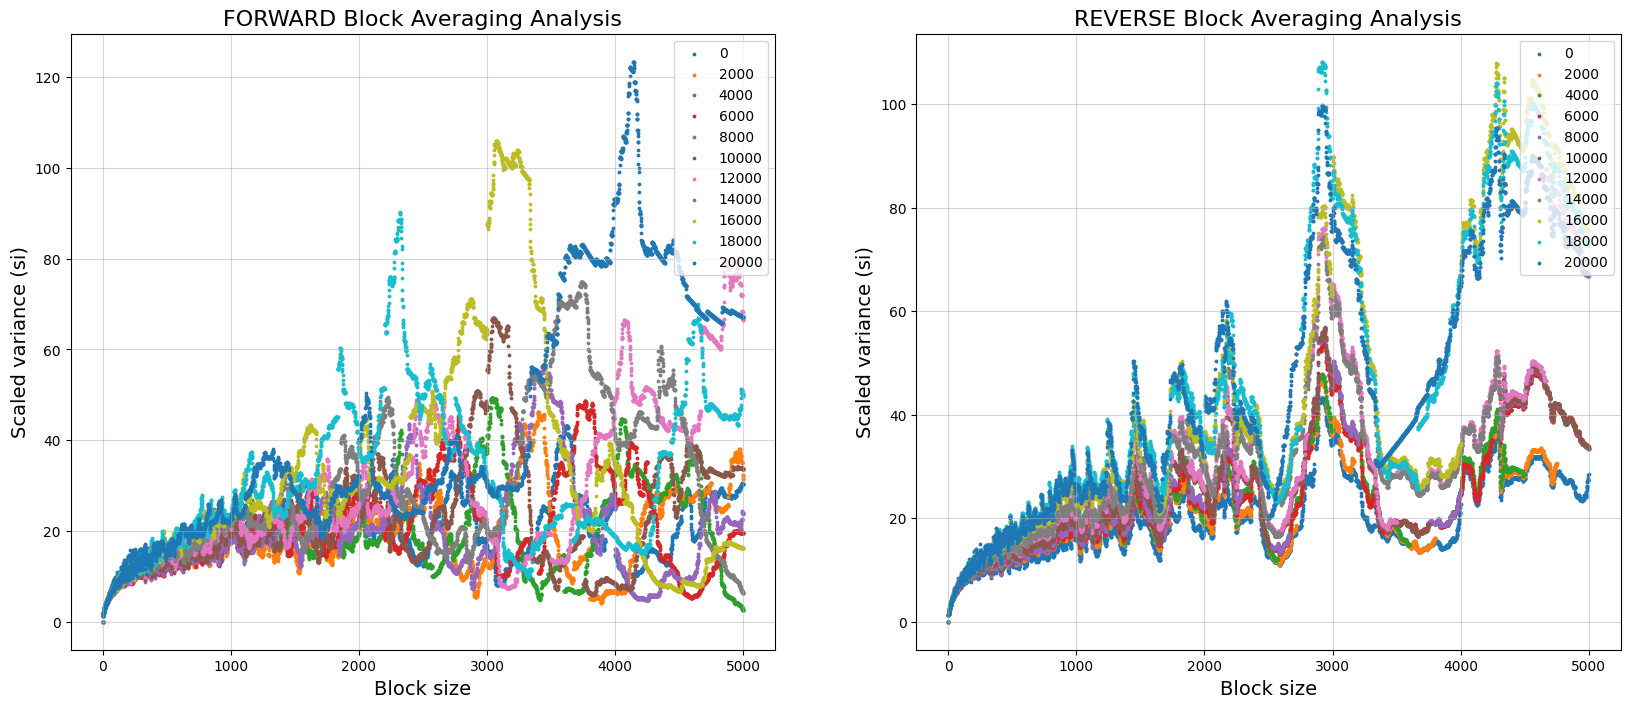

In [48]:
# Plot the result
fig, ax = plt.subplots(1, 2, figsize=(20, 8))
# plt.subplots_adjust(wspace=0.3)  # Adjust spacing between subplots
plt.grid(alpha=0.5)

for i in range(0, 20_001, 2_000):
    block_sizes, si = np.loadtxt(os.path.join(folder, f"stat_ineff/forward/{i}/output.txt"), skiprows=1, comments=["@", "#"], unpack=True)
    ax[0].scatter(block_sizes, si, s=3, label=str(i))

ax[0].set_xlabel('Block size', fontsize=14)
ax[0].set_ylabel('Scaled variance (si)', fontsize=14)
ax[0].set_title('FORWARD Block Averaging Analysis', fontsize=16)
ax[0].legend(fontsize=10, loc='upper right')
ax[0].grid(alpha=0.5)

for i in range(0, 20_001, 2_000):
    block_sizes, si = np.loadtxt(os.path.join(folder, f"stat_ineff/reverse/{i}/output.txt"), skiprows=1, comments=["@", "#"], unpack=True)
    plt.scatter(block_sizes, si, s=3, label=str(i))

ax[1].set_xlabel('Block size', fontsize=14)
ax[1].set_ylabel('Scaled variance (si)', fontsize=14)
ax[1].set_title('REVERSE Block Averaging Analysis', fontsize=16)
ax[1].legend(fontsize=10, loc='upper right')
ax[1].grid(alpha=0.5)

plt.show()

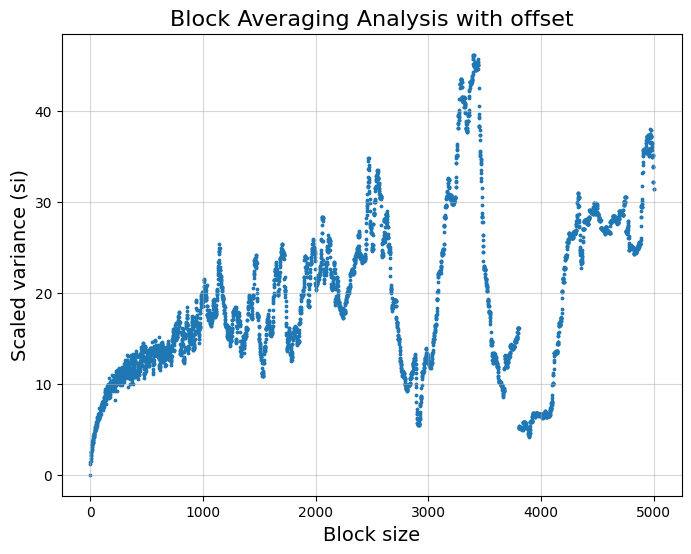

In [49]:
mode = ['forward', 'reverse'][0]
i = 2_000

block_sizes, si = np.loadtxt(os.path.join(folder, f"stat_ineff/{mode}/{i}/output.txt"), skiprows=1, comments=["@", "#"], unpack=True)

# Plot the result
plt.figure(figsize=(8, 6))
plt.grid(alpha=0.5)

plt.scatter(block_sizes, si, s=3)

plt.xlabel('Block size', fontsize=14)
plt.ylabel('Scaled variance (si)', fontsize=14)
plt.title('Block Averaging Analysis with offset', fontsize=16)

plt.show()

| Scale | begin_time, ps | block_length, шт |
| :----: | :---: | :-------: |
| 3.0 | 2_000 | 1_000 |
| 2.9 | --- | --- |
| 2.8 | 2_000 | 1_000 |
| 2.7 | --- | --- |
| 2.6 | --- | --- |
| 2.5 | 0 | 2_500 |
| 2.4 ??? | 4_000 | 1_000 | 
| 2.3 | 0 | 1_000 |
| 2.2 | 2_000 | 1_000 |
| 2.1 | --- | --- |
| 2.0 | 2_000 | 1_000 |
| 1.9 | 2_000 | 1_000 |
| 1.8 | 10_000 | 1_000 |
| 1.7 | 2_000 | 1_000 |
| 1.6 | --- | --- |
| 1.5 | 4_000 | 1_000 |
| 1.4 | 6_000 | 1_000 |
| 1.3 | 4_000 | 2_000 |
| 1.2 | 16_000 | 1_000 |
| 1.1 | 4_000 | 1_000 |
| 1.0 | 2_000 | 1_000 |

In [ ]:
ssh node2
cd ~/PANDA_exp/scaling/production
conda deactivate
source ~/PANDA/.venv/bin/activate
./get_stat_ineff.sh

cd ~/PANDA_exp/scaling/production/calcite_decane_tip4p_sc_2.2_offset_0.2
mv stat_ineff/ stat_ineff_backup/

In [ ]:
cp ~/PANDA_exp/scaling/production/calcite_decane_tip4p_sc_2.0_offset_0.2/get_stat_ineff.sh ./
export PYTHONPATH=$PYTHONPATH:~/PANDA

In [6]:
def get_real_std(x: np.array):
    a_k = t.pdf((1 + 0.95) / 2, len(x)-1)

    return np.std(x, ddof=1) * a_k / np.sqrt(len(x)-1)

In [51]:
result = {}
for sc in [str(f"{sc:.1f}") for sc in np.arange(1.0, 3.05, 0.1)]:
    result[sc] = [2000, 1]

result

{'1.0': [2000, 1],
 '1.1': [2000, 1],
 '1.2': [2000, 1],
 '1.3': [2000, 1],
 '1.4': [2000, 1],
 '1.5': [2000, 1],
 '1.6': [2000, 1],
 '1.7': [2000, 1],
 '1.8': [2000, 1],
 '1.9': [2000, 1],
 '2.0': [2000, 1],
 '2.1': [2000, 1],
 '2.2': [2000, 1],
 '2.3': [2000, 1],
 '2.4': [2000, 1],
 '2.5': [2000, 1],
 '2.6': [2000, 1],
 '2.7': [2000, 1],
 '2.8': [2000, 1],
 '2.9': [2000, 1],
 '3.0': [2000, 1]}

In [3]:
scales = {
    '0.5': [2000, 2],
    '0.6': [2000, 1],
    '0.7': [2000, 4],
    '0.8': [2000, 1],
    '0.9': [2000, 1],
    '1.0': [2000, 1],
    '1.1': [2000, 1],
    '1.2': [2000, 1],
    '1.3': [2000, 1],
    '1.4': [2000, 1],
    '1.5': [2000, 2],
    '1.6': [2000, 1],
    '1.7': [2000, 1],
    '1.8': [2000, 1],
    '1.9': [2000, 1],
    '2.0': [2000, 1],
    '2.1': [2000, 1],
    '2.2': [2000, 1],
    '2.3': [2000, 1],
    '2.4': [2000, 3],
    '2.5': [2000, 1],
    '2.6': [2000, 0],
    '2.7': [2000, 1],
    '2.8': [2000, 1],
    '2.9': [2000, 1],
    '3.0': [2000, 1]
}

## Calculate density profiles to each configuration

In [15]:
folder = f'{root}/PANDA_exp/scaling/production/'

args = {
    # "trajectory_file": os.path.join(folder, 'cal_dec_tip4p.xtc'),
    # "topology_file": os.path.join(folder, 'cal_dec_tip4p.gro'),
    "residue": 'DECAN',
    "sl": 200,
    "chunk_length": 1_000,
    "begin_time": 0,
    "time": 40_000,
    "timestep": 2,
    "units": 'ps',
}

for sc in list(scales.keys())[-4:]:
    print(f'Processing {sc}...')
    args['trajectory_file'] = os.path.join(folder, f'calcite_decane_tip4p_sc_{sc}_offset_0.2/cal_dec_tip4p.xtc')
    args['topology_file'] = os.path.join(folder, f'calcite_decane_tip4p_sc_{sc}_offset_0.2/cal_dec_tip4p.gro')


    # axises = np.load(osp.join(folder, 'axises.npy'))
    # denses = np.load(osp.join(folder, 'denses.npy'))
    axises, denses = get_density_profile(**args)

    np.save(os.path.join(folder, f'calcite_decane_tip4p_sc_{sc}_offset_0.2', 'axises'), axises)
    np.save(os.path.join(folder, f'calcite_decane_tip4p_sc_{sc}_offset_0.2', 'denses'), denses)


Processing 2.7...


Chunk: 100%|██████████| 40/40 [03:02<00:00,  4.55s/it]


Processing 2.8...


Chunk: 100%|██████████| 40/40 [05:17<00:00,  7.93s/it]  


Processing 2.9...


Chunk: 100%|██████████| 40/40 [04:00<00:00,  6.02s/it]  


Processing 3.0...


Chunk: 100%|██████████| 40/40 [03:46<00:00,  5.67s/it]  


In [ ]:
### Decane ###

folder = f'{root}/PANDA_exp/scaling/production/'

args = {
    # "trajectory_file": os.path.join(folder, 'cal_dec_tip4p.xtc'),
    # "topology_file": os.path.join(folder, 'cal_dec_tip4p.gro'),
    "residue": 'DECAN',
    "H": 9,
    "l": 18.004 / 9,
    "phi": 0.5,
    "rho_bulk": 3.0896 * 10,
    "interface_type": 'roll',
    "sl": 200,
    "block_length": 1_000,
    "chunk_length": 1_000,
    "begin_time": 0,
    "time": 40_000,
    "timestep": 2,
    "units": 'ps',
}

angles = []
delta = []

# times = []
# for n_jobs in [1, 2, 4, 8, 16]:
for sc in list(scales.keys())[17:18]:
    print(f'Processing {sc}...')
    start = time.perf_counter()
    axises = np.load(os.path.join(folder, f'calcite_decane_tip4p_sc_{sc}_offset_0.2', 'axises.npy'))
    denses = np.load(os.path.join(folder, f'calcite_decane_tip4p_sc_{sc}_offset_0.2', 'denses.npy'))

    # Averaging axises and denses arrays by blocks
    blocks_num = axises.shape[0] // args["block_length"]

    mean_axises = np.zeros((blocks_num, axises.shape[1]))
    mean_denses = np.zeros((blocks_num, denses.shape[1]))
    for i in range(blocks_num):
        mean_axises[i, :] = np.mean(axises[(i * args["block_length"]):((i+1) * args["block_length"]), :], axis=0)
        mean_denses[i, :] = np.mean(denses[(i * args["block_length"]):((i + 1) * args["block_length"]), :], axis=0)

    # Calculating contact angle using PANDA algorithm
    angles_alpha = np.zeros(blocks_num)
    delta_alpha = np.zeros(blocks_num)

    normalized_axises = np.zeros((blocks_num, axises.shape[1]))
    normalized_denses = np.zeros((blocks_num, denses.shape[1]))
    for i in tqdm(range(blocks_num)):
        axis_i, dens_i, result_alpha = profile_approx_from_array(
            mean_denses[i, :],
            mean_axises[i, :],
            args["rho_bulk"],
            args["l"],
            args["phi"],
            args["H"],
            interface_type=args["interface_type"],
            samples=20,
            extention='alpha',
            n_jobs=8,
            display=False
        )

        normalized_axises[i, :] = axis_i
        normalized_denses[i, :] = dens_i

        angles_alpha[i] = result_alpha['theta']
        delta_alpha[i] = result_alpha['delta']

        # -----------
        scale = 1.0
        # Visualisation of density profile with different PANDA algorithm version
        # fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 12), dpi=300)
        # fig, ax = plt.subplots(figsize=(4*scale, 3*scale), dpi=300)
        fig, ax = plt.subplots(figsize=(4*scale, 2.5*scale), dpi=300)

        def findvalue(seq, val, rtol=0.05):    # value that works for your example
            return np.where(np.isclose(seq, val, rtol=rtol))[0]

        offset = len(normalized_axises[i, :])- findvalue(normalized_axises[i, :], 0.6, 0.01)[0]

        ax.grid(alpha=0.5)
        ax.plot(
            normalized_axises[i, offset:-offset], normalized_denses[i, offset:-offset],
            label=r'$n$-decane',
            color='#DF2E38',
            linewidth=2.5
        )

        rho_alpha = getattr(panda.interface, f"rho_roll_alpha")

        ax.plot(
            normalized_axises[i, offset:-offset], rho_alpha(normalized_axises[i, offset:-offset], args["l"], args["phi"], angles_alpha[i], delta_alpha[i]),
            # label=r'approximation with $\theta$ = {:.1f}$^\circ$'.format(np.rad2deg(angles_alpha[i])),
            label=r'PANDA-NN ($\theta$ = {:.1f}$^\circ$)'.format(np.rad2deg(angles_alpha[i])),
            color='#000000',
            linewidth=3,
            linestyle='dashed'
        )


        xticks = np.round(np.arange(-0.6, 0.61, 0.3), 1)
        # ax.xaxis.set_major_locator(FixedLocator(xticks))
        ax.set_xticks(xticks, labels=xticks, fontproperties=helvetica_font, fontsize=12)
        ax.set_xlabel('z', fontproperties=helvetica_font, fontsize=14)

        yticks = np.round(np.arange(0, 1.01, 0.2), 1)
        ax.set_yticks(yticks, labels=yticks, fontproperties=helvetica_font, fontsize=12)
        ax.set_ylabel(r'$\rho / \rho_{bulk}$', fontproperties=helvetica_font, fontsize=14)

        ax.legend(loc='best', prop=helvetica_font, fontsize=12)

        plt.show()
        # -----------

    angles.append(angles_alpha)
    delta.append(delta_alpha)
    print(f'Processing {sc} took {time.perf_counter() - start} seconds')

    # np.save('../decane_angles_checkpoint', angles)
    # np.save('../decane_delta_checkpoint', delta)

# times.append(time.perf_counter() - start)
# angles = np.array(angles)
# delta = np.array(delta)

# np.save('../decane_angles', angles)
# np.save('../decane_delta', delta)

In [14]:
scales_b = [str(round(i, 1)) for i in np.arange(0.3, 2.65, 0.1)]

In [ ]:
### Benzene ###

folder = f'{root}/PANDA_exp/scaling/benzene/'

args = {
    "residue": 'BENZE',
    "H": 9,
    "l": 2.223,
    "phi": 0.5,
    "rho_bulk": 40.521216500472484,
    "interface_type": 'roll',
    "sl": 200,
    "block_length": 1_000,
    "chunk_length": 1_000,
    "begin_time": 0,
    "time": 30_000,
    "timestep": 2,
    "units": 'ps',
}

angles = []
delta = []

# times = []
# for n_jobs in [1, 2, 4, 8, 16]:
print(scales_b)
for sc in scales_b:
    print(f'Processing {sc}...')
    start = time.perf_counter()
    axises = np.load(os.path.join(folder, f'{sc}_axises.npy'))
    denses = np.load(os.path.join(folder, f'{sc}_denses.npy'))

    # Averaging axises and denses arrays by blocks
    blocks_num = axises.shape[0] // args["block_length"]

    mean_axises = np.zeros((blocks_num, axises.shape[1]))
    mean_denses = np.zeros((blocks_num, denses.shape[1]))
    for i in range(blocks_num):
        mean_axises[i, :] = np.mean(axises[(i * args["block_length"]):((i+1) * args["block_length"]), :], axis=0)
        mean_denses[i, :] = np.mean(denses[(i * args["block_length"]):((i + 1) * args["block_length"]), :], axis=0)

    # Calculating contact angle using PANDA algorithm
    angles_alpha = np.zeros(blocks_num)
    delta_alpha = np.zeros(blocks_num)

    normalized_axises = np.zeros((blocks_num, axises.shape[1]))
    normalized_denses = np.zeros((blocks_num, denses.shape[1]))
    for i in tqdm(range(blocks_num)):
        axis_i, dens_i, result_alpha = profile_approx_from_array(
            mean_denses[i, :],
            mean_axises[i, :],
            args["rho_bulk"],
            args["l"],
            args["phi"],
            args["H"],
            interface_type=args["interface_type"],
            samples=20,
            extention='alpha',
            n_jobs=8,
            display=False
        )

        normalized_axises[i, :] = axis_i
        normalized_denses[i, :] = dens_i

        angles_alpha[i] = result_alpha['theta']
        delta_alpha[i] = result_alpha['delta']

        # -----------
        # scale = 1.0
        # # Visualisation of density profile with different PANDA algorithm version
        # # fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 12), dpi=300)
        # # fig, ax = plt.subplots(figsize=(4*scale, 3*scale), dpi=300)
        # fig, ax = plt.subplots(figsize=(4*scale, 2.5*scale), dpi=300)

        # def findvalue(seq, val, rtol=0.05):    # value that works for your example
        #     return np.where(np.isclose(seq, val, rtol=rtol))[0]

        # offset = len(normalized_axises[i, :])- findvalue(normalized_axises[i, :], 0.6, 0.01)[0]

        # ax.grid(alpha=0.5)
        # ax.plot(
        #     normalized_axises[i, offset:-offset], normalized_denses[i, offset:-offset],
        #     label='decane',
        #     color='#DF2E38',
        #     linewidth=2.5
        # )

        # rho_alpha = getattr(panda.interface, f"rho_roll_alpha")

        # ax.plot(
        #     normalized_axises[i, offset:-offset], rho_alpha(normalized_axises[i, offset:-offset], args["l"], args["phi"], angles_alpha[i], delta_alpha[i]),
        #     # label=r'approximation with $\theta$ = {:.1f}$^\circ$'.format(np.rad2deg(angles_alpha[i])),
        #     label=r'PANDA-NN ($\theta$ = {:.1f}$^\circ$)'.format(np.rad2deg(angles_alpha[i])),
        #     color='#000000',
        #     linewidth=3,
        #     linestyle='dashed'
        # )


        # xticks = np.round(np.arange(-0.6, 0.61, 0.3), 1)
        # # ax.xaxis.set_major_locator(FixedLocator(xticks))
        # ax.set_xticks(xticks, labels=xticks, fontproperties=helvetica_font, fontsize=12)
        # ax.set_xlabel('z', fontproperties=helvetica_font, fontsize=14)

        # yticks = np.round(np.arange(0, 1.01, 0.2), 1)
        # ax.set_yticks(yticks, labels=yticks, fontproperties=helvetica_font, fontsize=12)
        # ax.set_ylabel(r'$\rho / \rho_{bulk}$', fontproperties=helvetica_font, fontsize=14)

        # ax.legend(loc='best', prop=helvetica_font, fontsize=12)

        # plt.show()
        # -----------

    angles.append(angles_alpha)
    delta.append(delta_alpha)
    print(f'Processing {sc} took {time.perf_counter() - start} seconds')

    np.save('../benzene_angles_checkpoint', angles)
    np.save('../benzene_delta_checkpoint', delta)

# times.append(time.perf_counter() - start)
angles = np.array(angles)
delta = np.array(delta)

np.save('../benzene_angles', angles)
np.save('../benzene_delta', delta)

  0%|          | 0/15 [00:00<?, ?it/s]

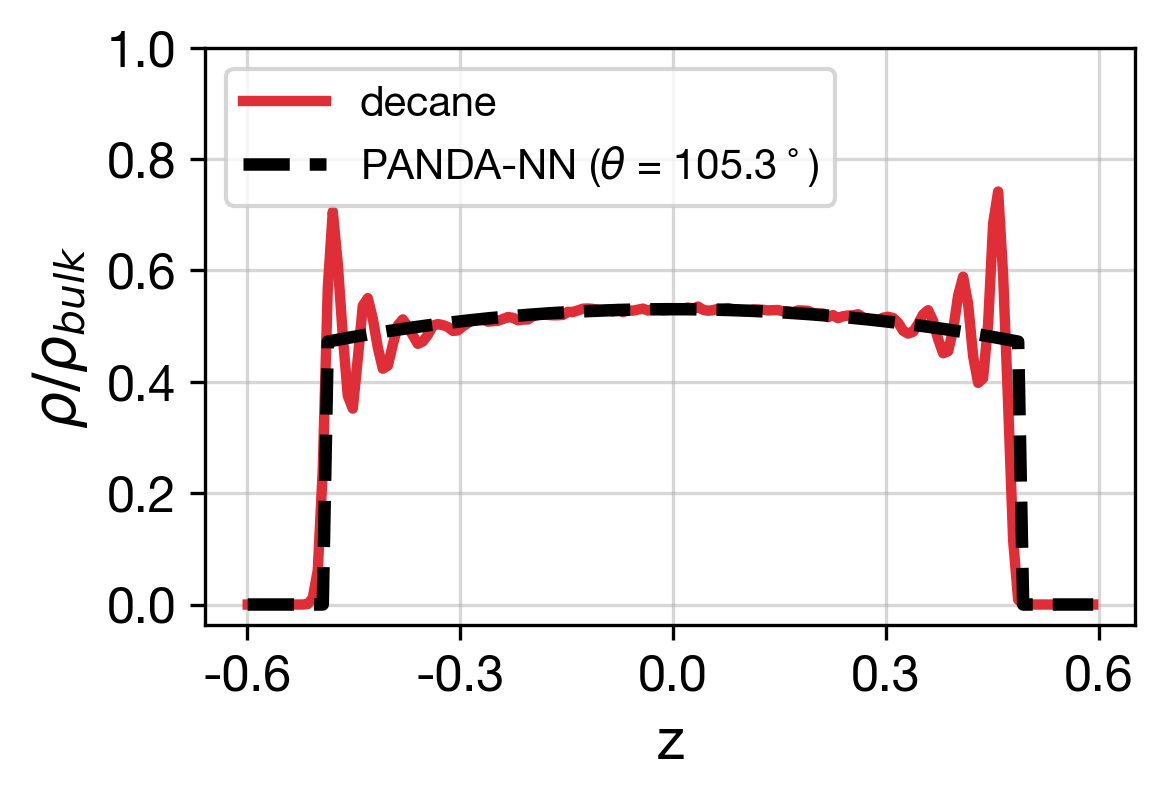

  7%|▋         | 1/15 [00:04<01:09,  5.00s/it]

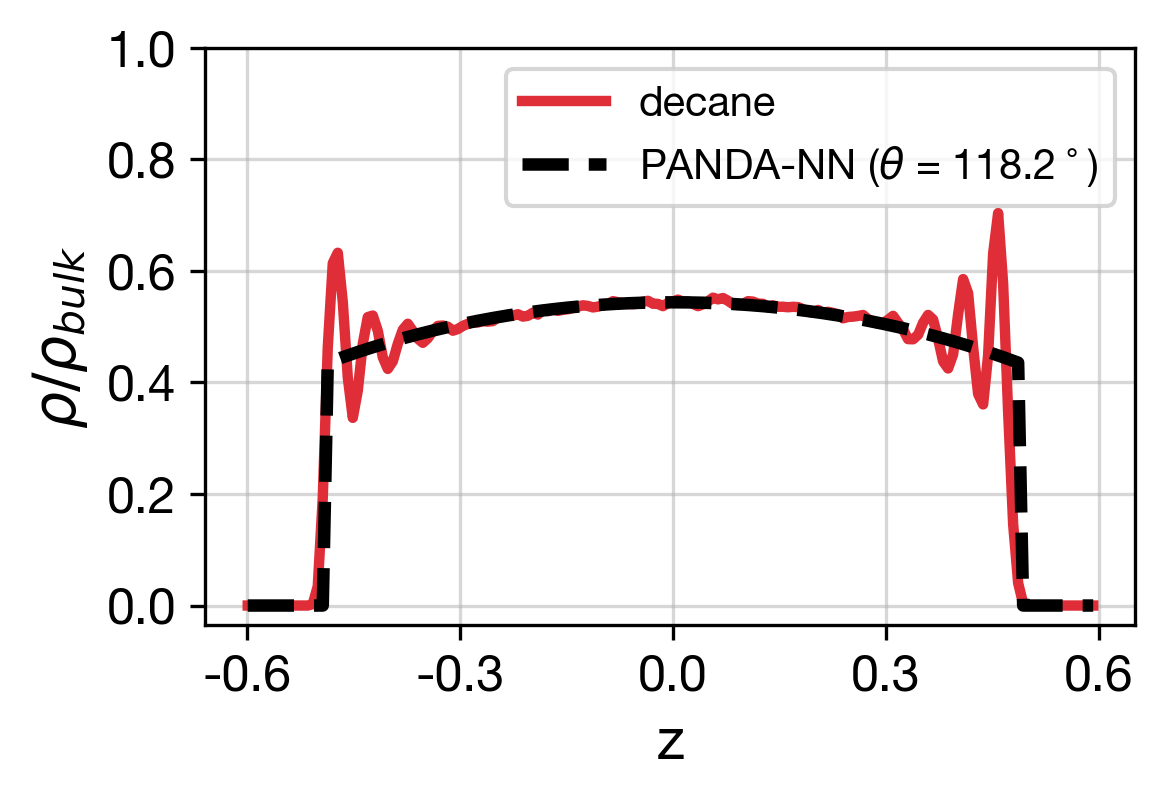

 13%|█▎        | 2/15 [00:10<01:12,  5.54s/it]

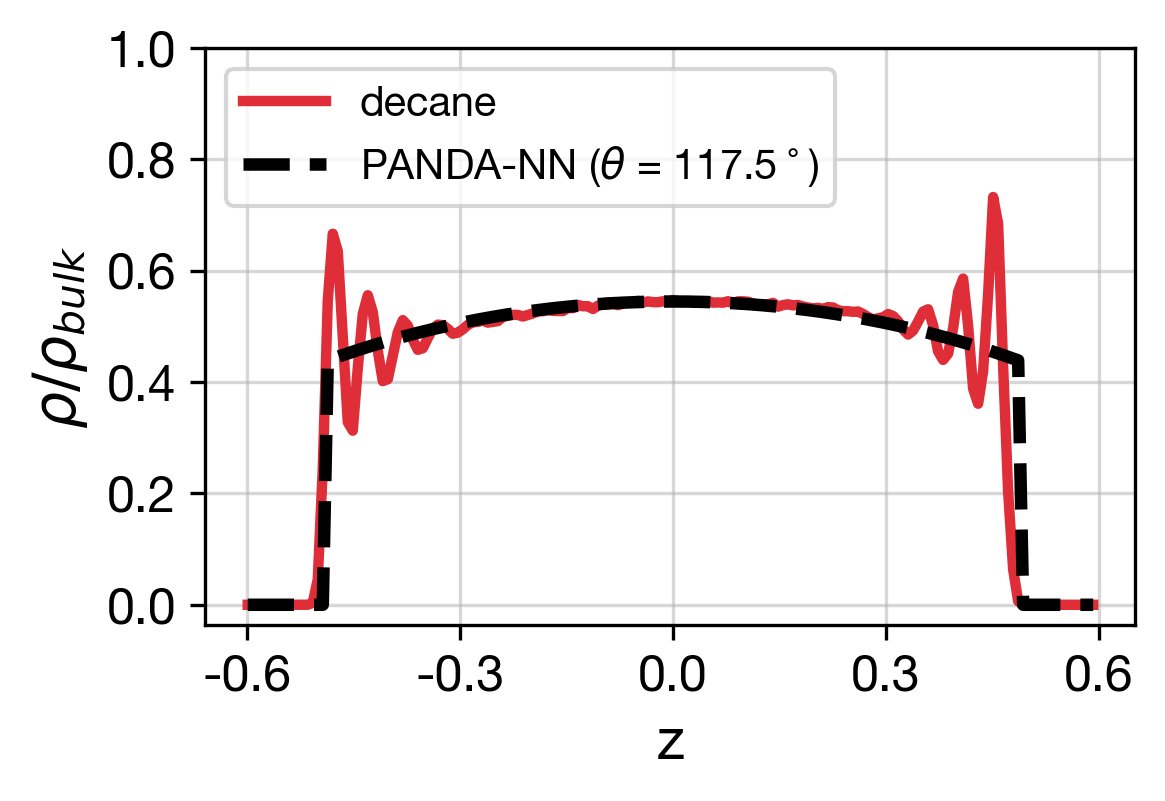

 20%|██        | 3/15 [00:15<01:01,  5.16s/it]

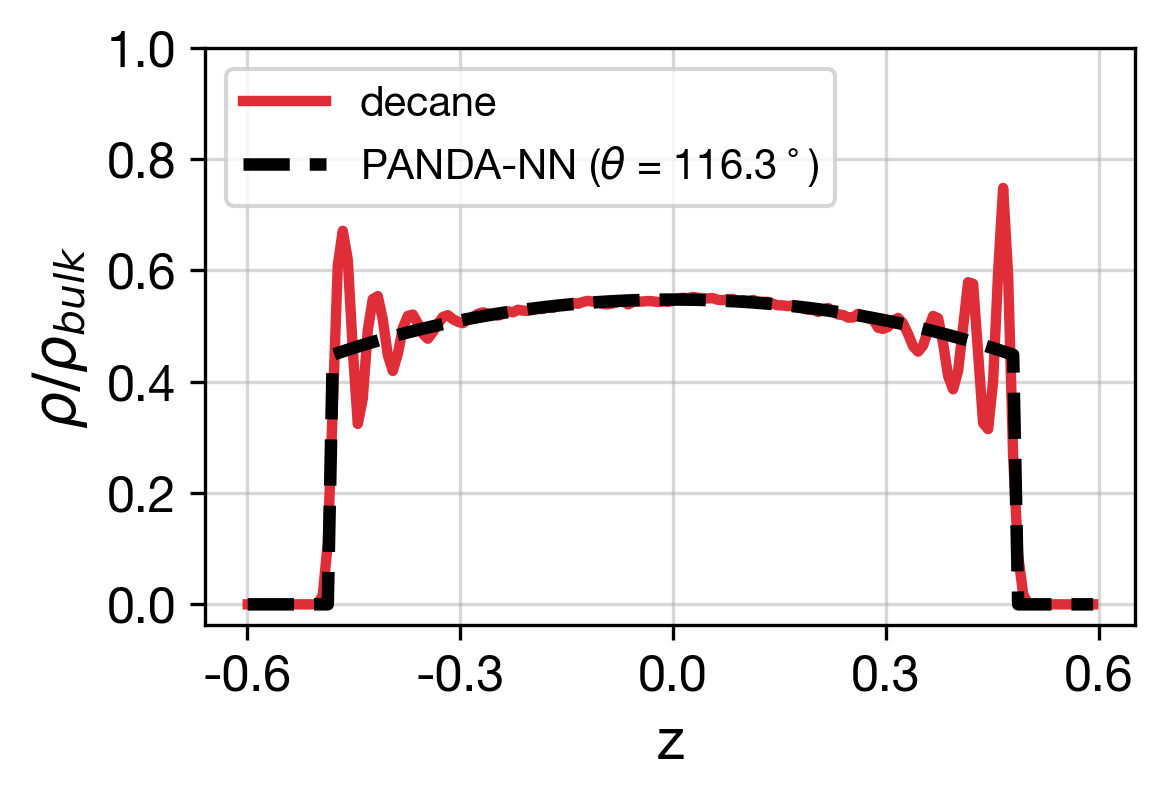

 27%|██▋       | 4/15 [00:22<01:06,  6.03s/it]

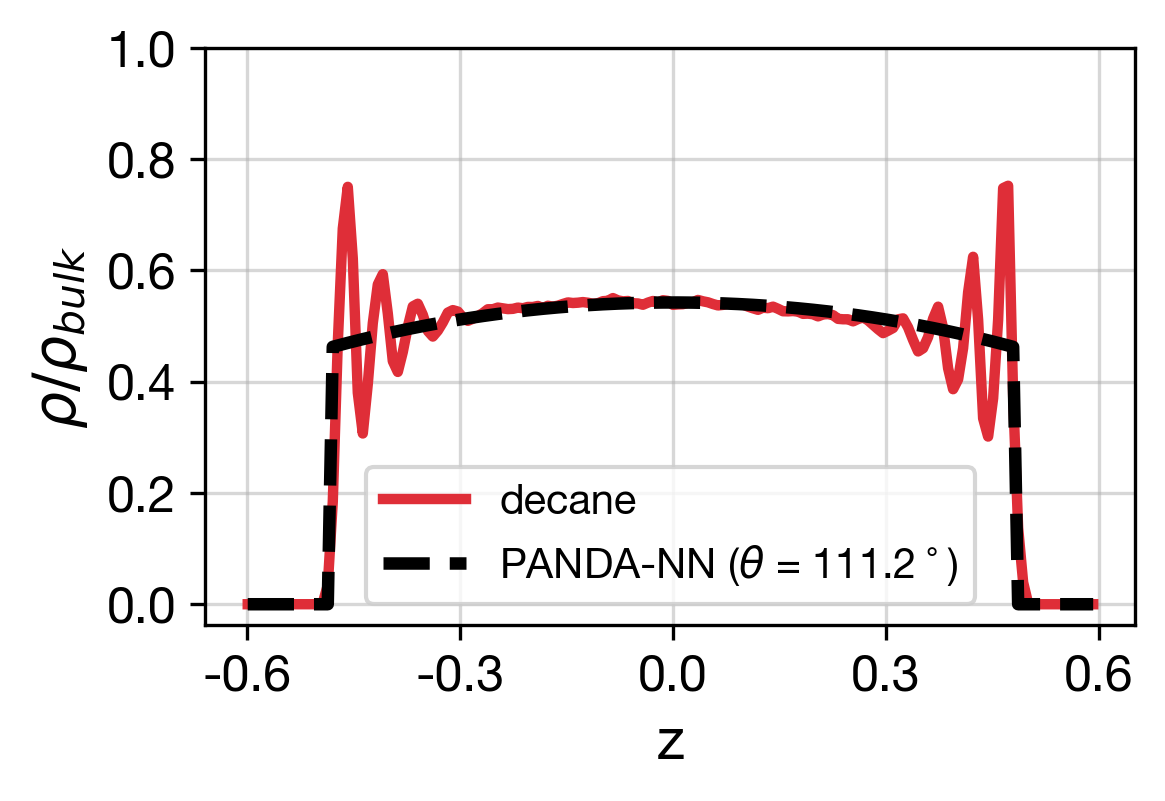

 33%|███▎      | 5/15 [00:28<00:59,  5.99s/it]

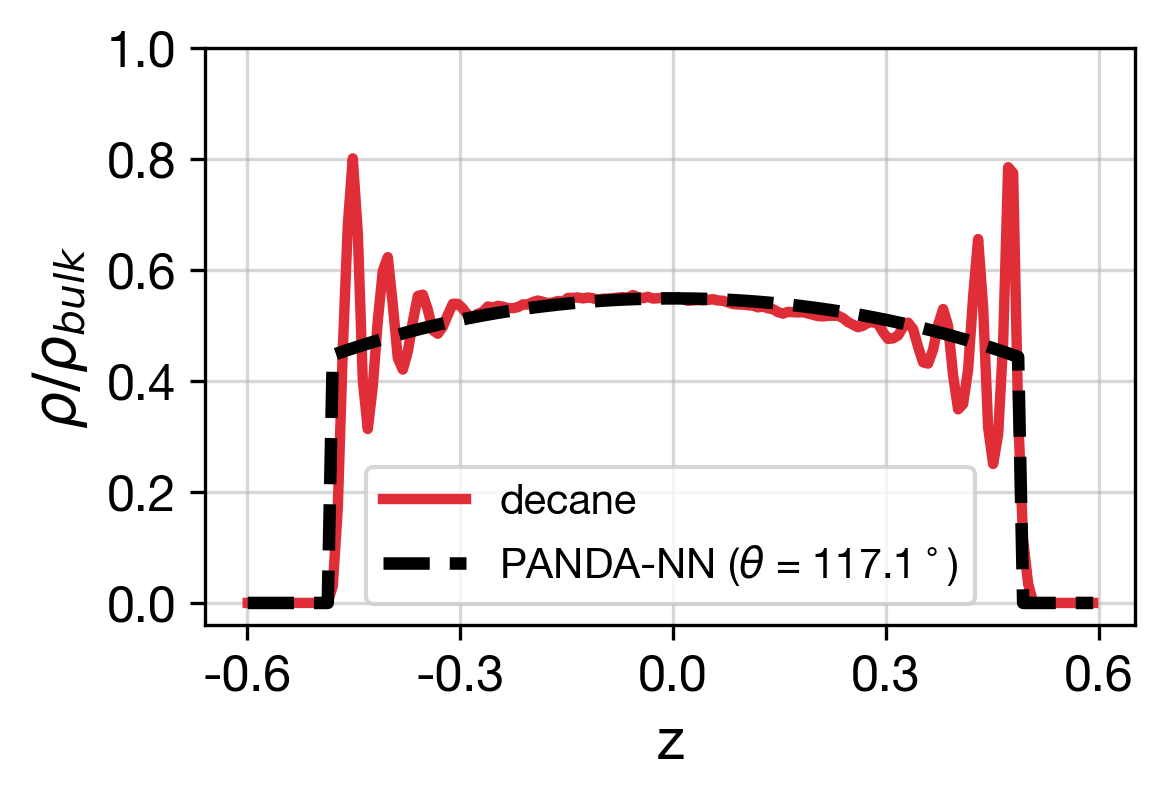

 40%|████      | 6/15 [00:34<00:53,  5.98s/it]

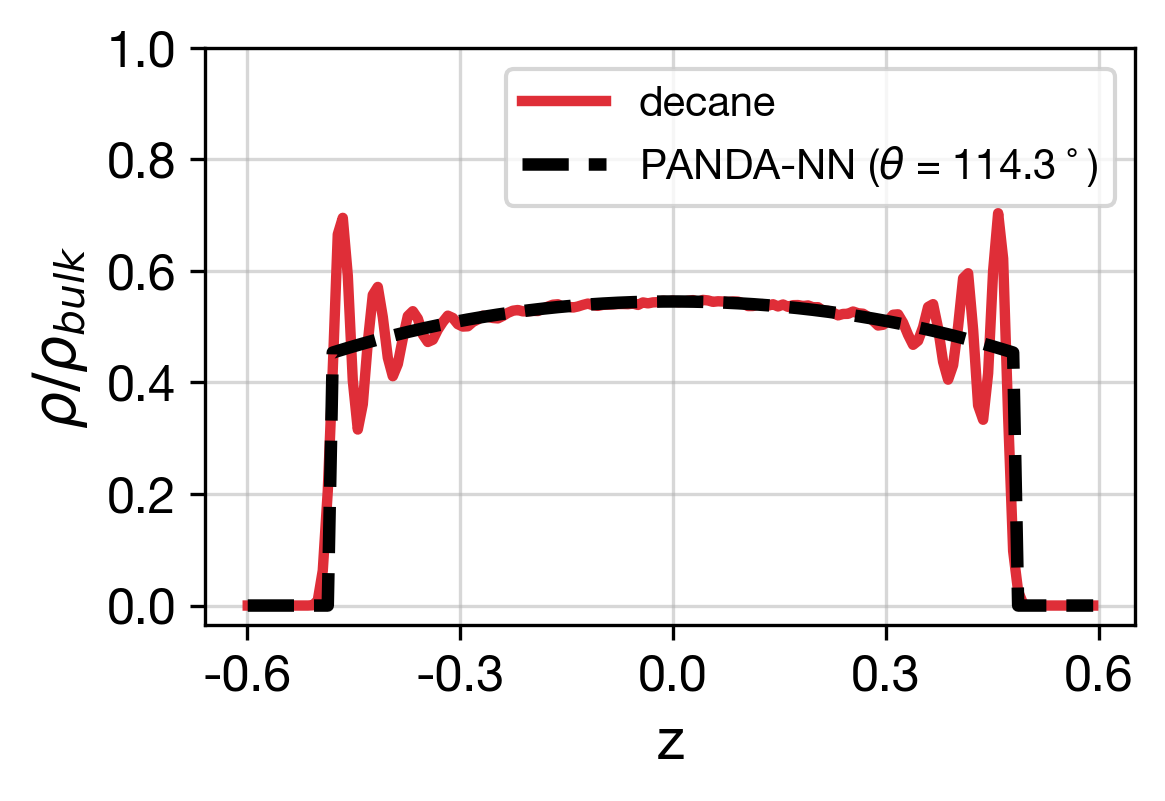

 47%|████▋     | 7/15 [00:42<00:51,  6.39s/it]

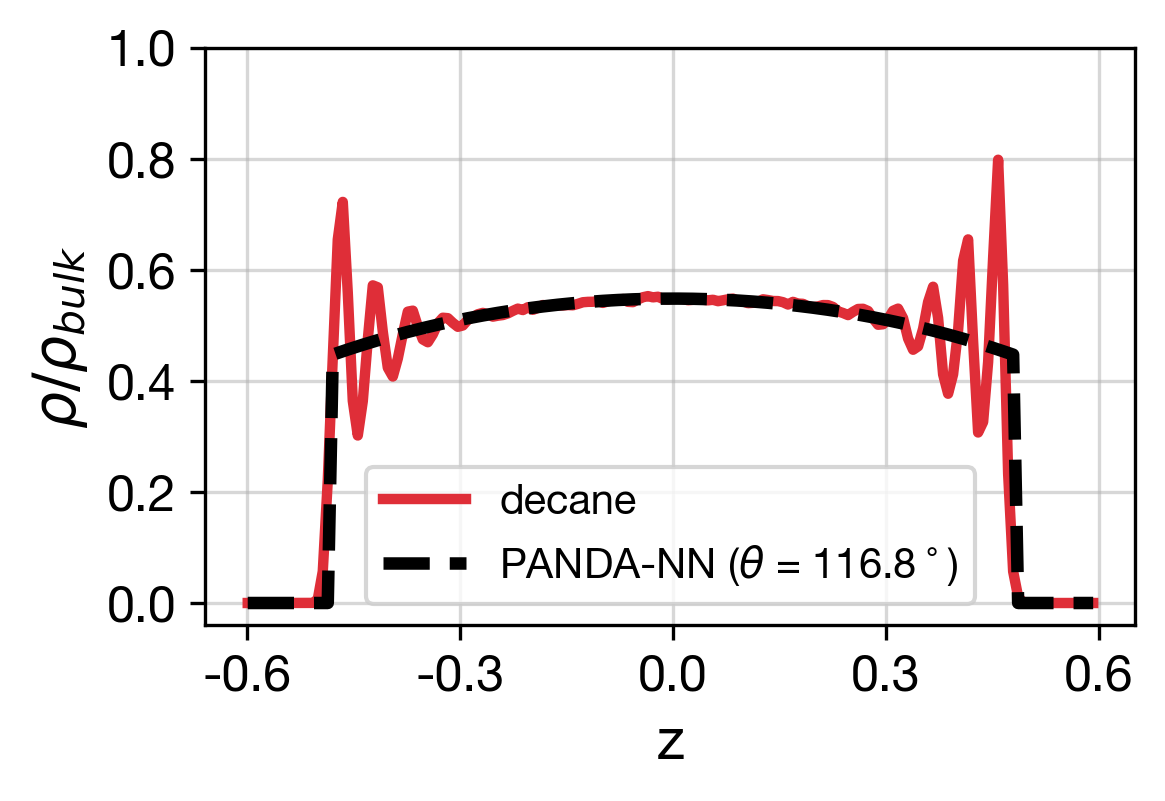

 53%|█████▎    | 8/15 [00:48<00:44,  6.38s/it]

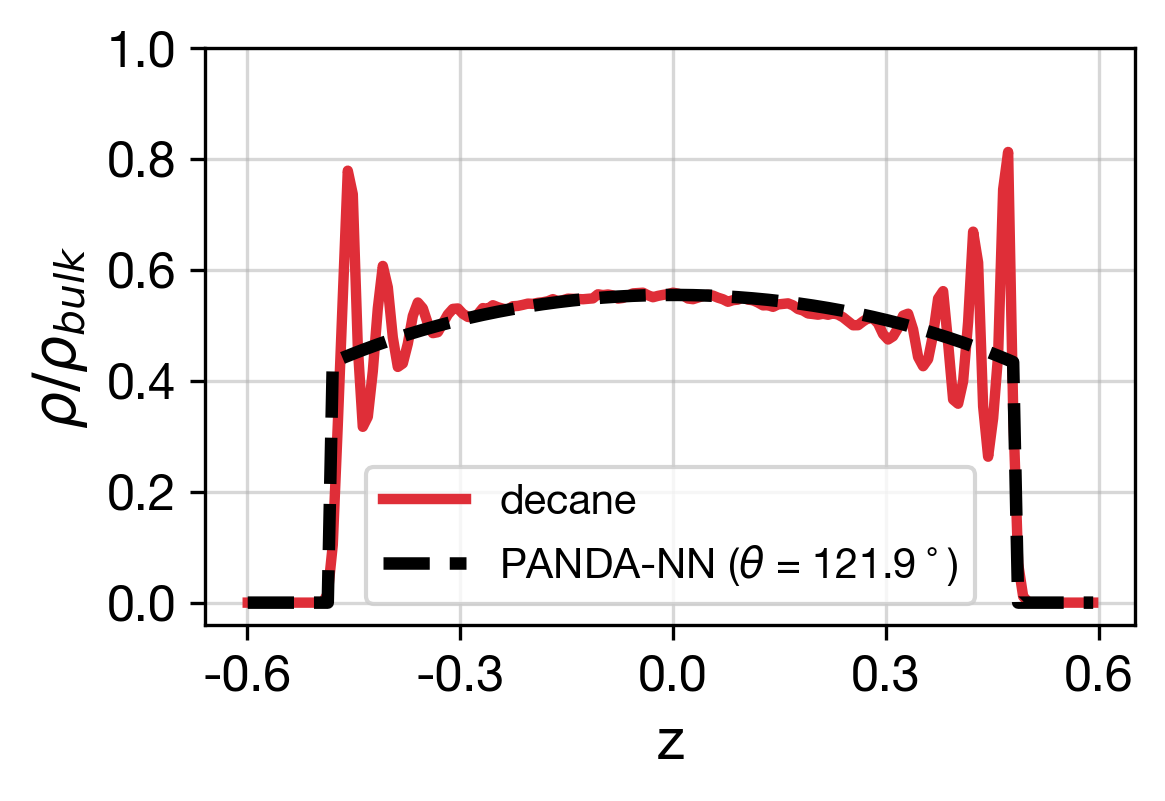

 60%|██████    | 9/15 [00:55<00:39,  6.52s/it]

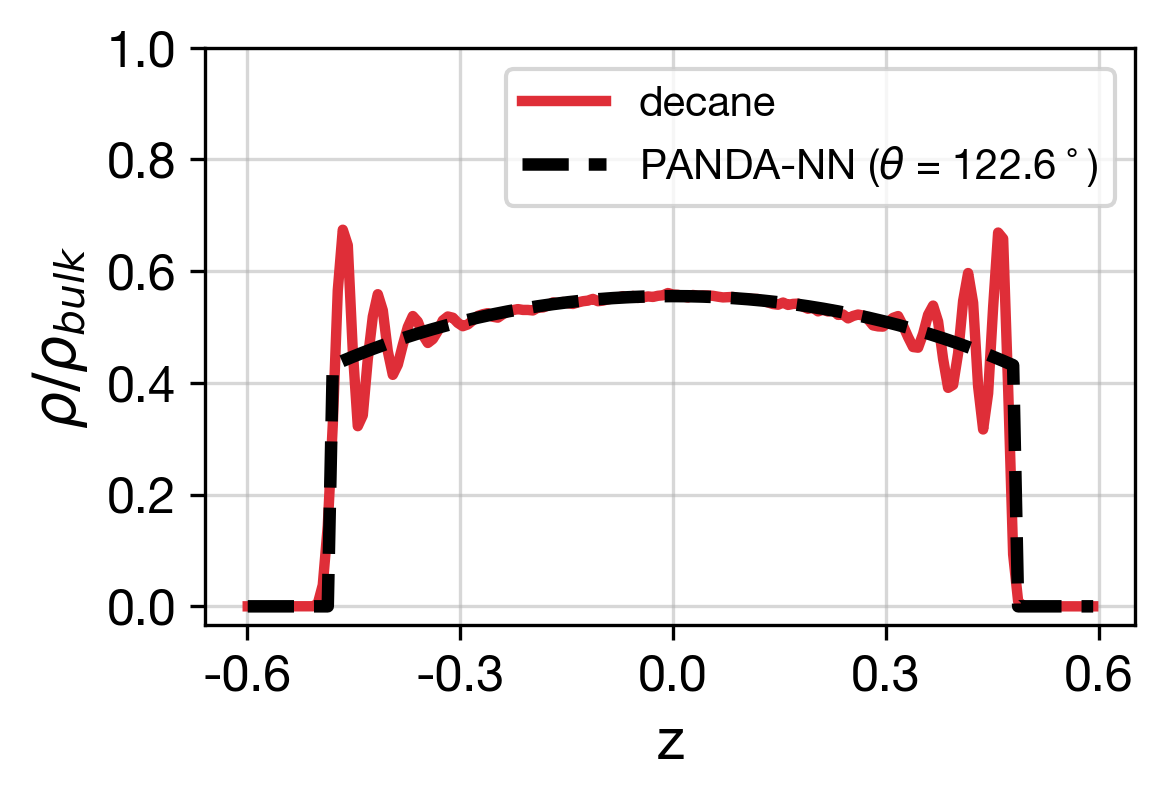

 67%|██████▋   | 10/15 [01:02<00:33,  6.73s/it]

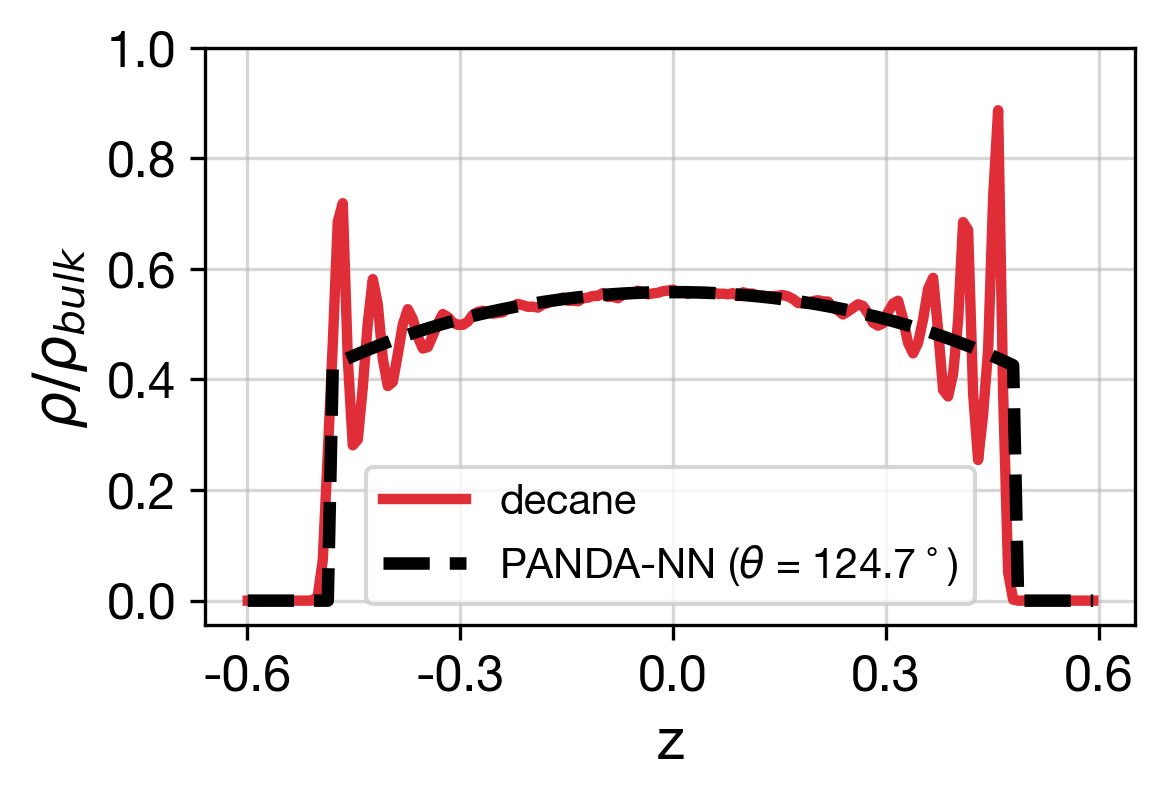

 73%|███████▎  | 11/15 [01:09<00:27,  6.78s/it]

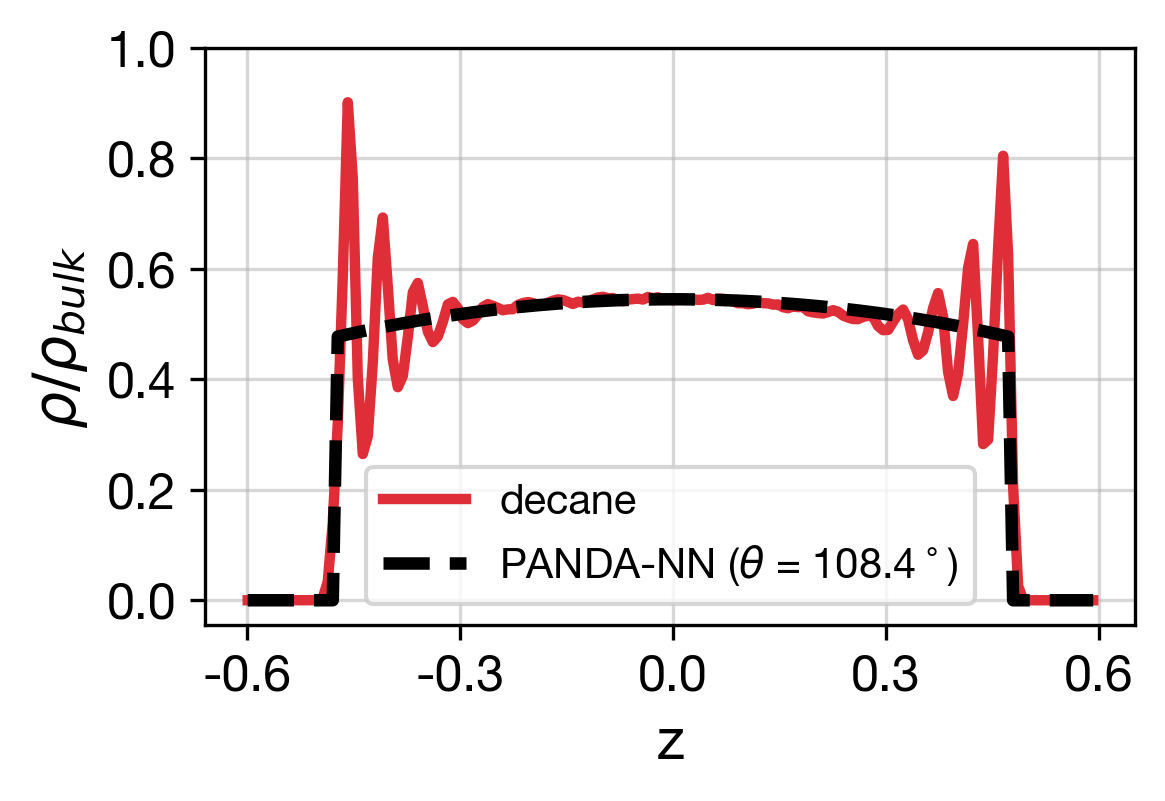

 80%|████████  | 12/15 [01:16<00:20,  6.82s/it]

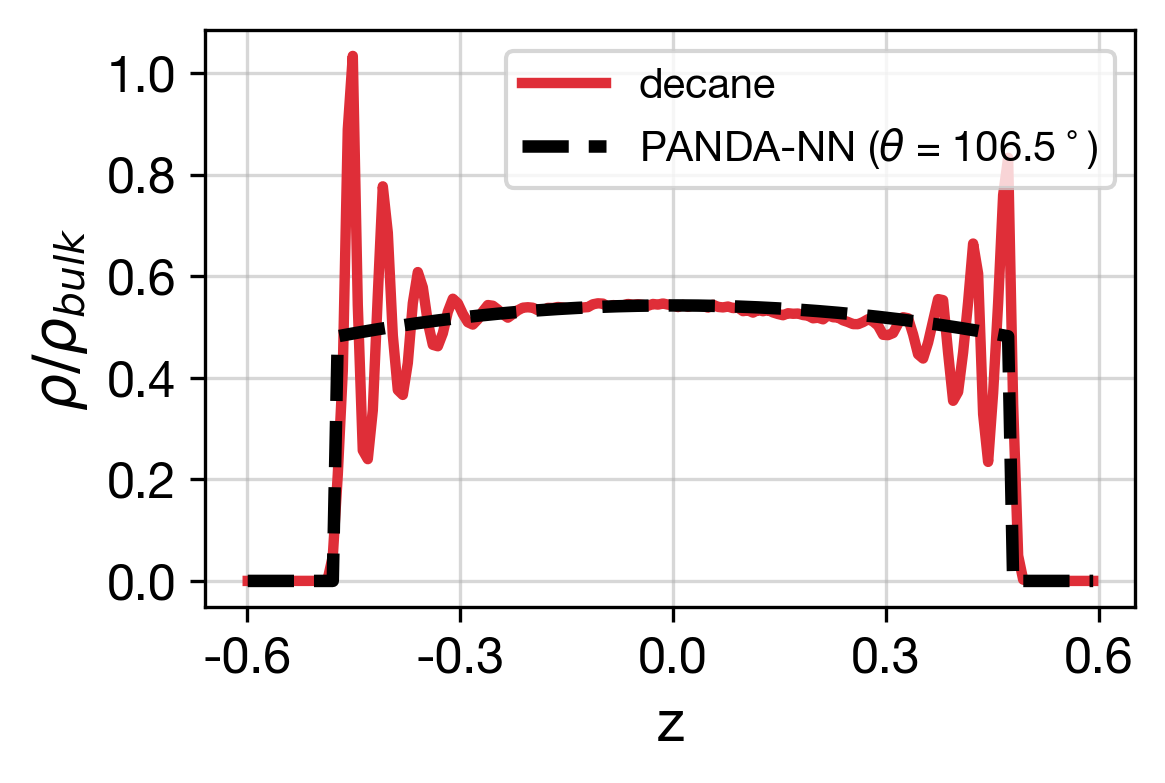

 87%|████████▋ | 13/15 [01:22<00:13,  6.66s/it]

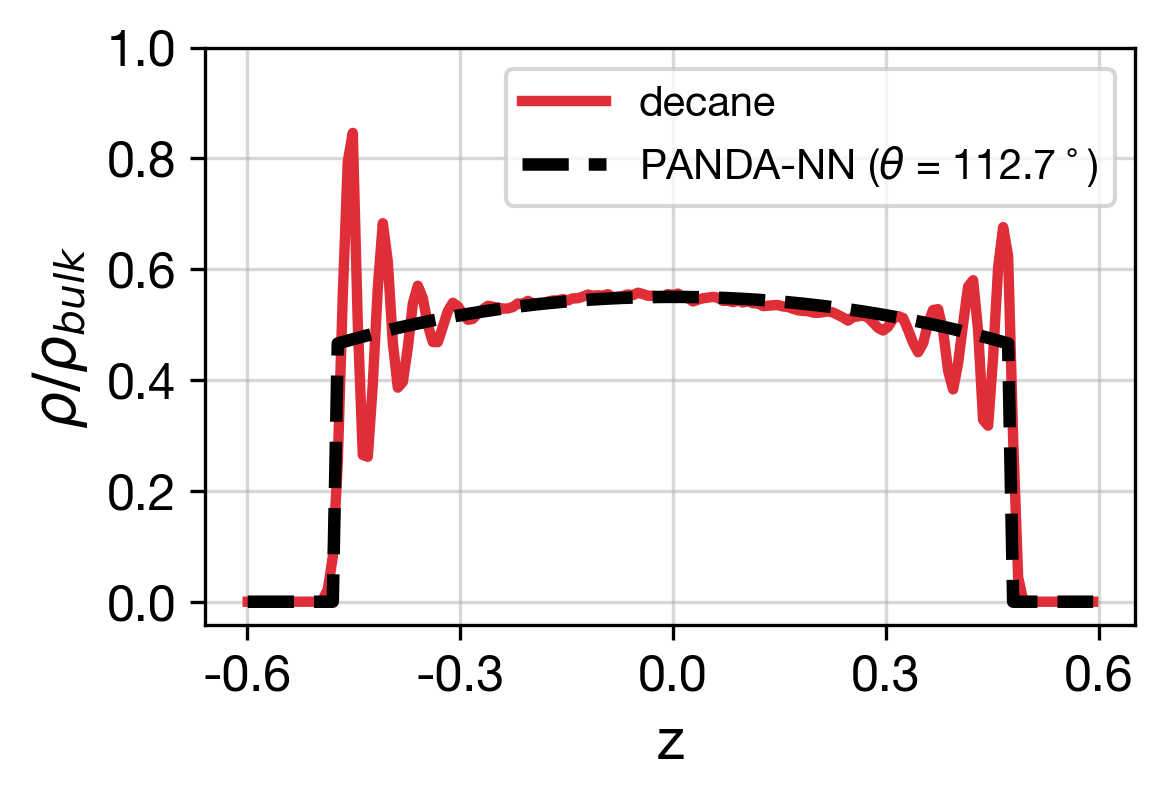

 93%|█████████▎| 14/15 [01:29<00:06,  6.69s/it]

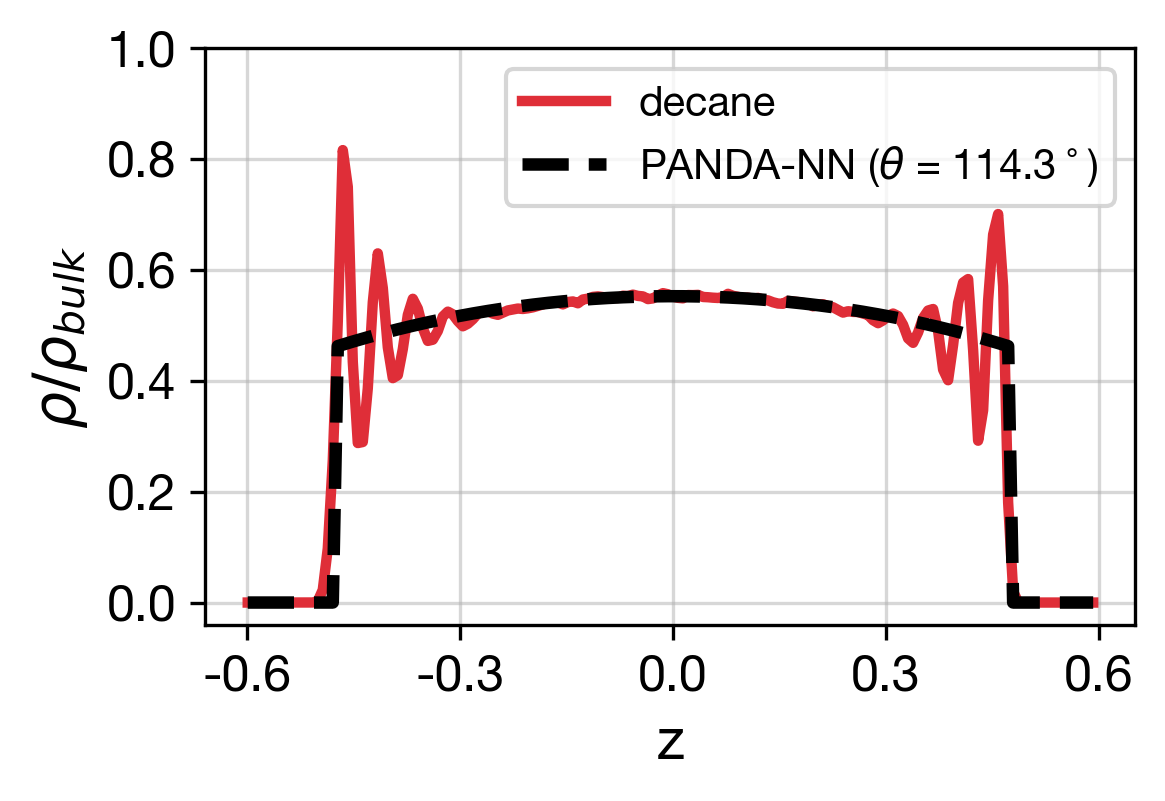

100%|██████████| 15/15 [01:35<00:00,  6.38s/it]


In [3]:
### Toluene / Hexane / octadecane ###

residue = "octadecane" # "hexane" # "toluene"
folder = f'{root}/PANDA_exp/scaling/{residue}/'

args = {
    "residue": 'TRCNT', # 'HEXAN', # 'BENZE',
    "H": 9,
    "l": 2.223,
    "phi": 0.5,
    "rho_bulk": 1.8386152288521267 * 18, # 5.666604050736351 * 7,
    "interface_type": 'roll',
    "sl": 200,
    "block_length": 1_000,
    "chunk_length": 1_000,
    "begin_time": 0,
    "time": 30_000,
    "timestep": 2,
    "units": 'ps',
}

angles = []
delta = []

axises = np.load(os.path.join(folder, f'{residue}_axises.npy'))
denses = np.load(os.path.join(folder, f'{residue}_denses.npy'))

# Averaging axises and denses arrays by blocks
blocks_num = axises.shape[0] // args["block_length"]

mean_axises = np.zeros((blocks_num, axises.shape[1]))
mean_denses = np.zeros((blocks_num, denses.shape[1]))
for i in range(blocks_num):
    mean_axises[i, :] = np.mean(axises[(i * args["block_length"]):((i+1) * args["block_length"]), :], axis=0)
    mean_denses[i, :] = np.mean(denses[(i * args["block_length"]):((i + 1) * args["block_length"]), :], axis=0)

# Calculating contact angle using PANDA algorithm
angles_alpha = np.zeros(blocks_num)
delta_alpha = np.zeros(blocks_num)

normalized_axises = np.zeros((blocks_num, axises.shape[1]))
normalized_denses = np.zeros((blocks_num, denses.shape[1]))
for i in tqdm(range(blocks_num)):
    axis_i, dens_i, result_alpha = profile_approx_from_array(
        mean_denses[i, :],
        mean_axises[i, :],
        args["rho_bulk"],
        args["l"],
        args["phi"],
        args["H"],
        interface_type=args["interface_type"],
        samples=50,
        extention='alpha',
        n_jobs=8,
        display=False
    )

    normalized_axises[i, :] = axis_i
    normalized_denses[i, :] = dens_i

    angles_alpha[i] = result_alpha['theta']
    delta_alpha[i] = result_alpha['delta']

    # -----------
    scale = 1.0
    # Visualisation of density profile with different PANDA algorithm version
    # fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 12), dpi=300)
    # fig, ax = plt.subplots(figsize=(4*scale, 3*scale), dpi=300)
    fig, ax = plt.subplots(figsize=(4*scale, 2.5*scale), dpi=300)

    def findvalue(seq, val, rtol=0.05):    # value that works for your example
        return np.where(np.isclose(seq, val, rtol=rtol))[0]

    offset = len(normalized_axises[i, :])- findvalue(normalized_axises[i, :], 0.6, 0.01)[0]

    ax.grid(alpha=0.5)
    ax.plot(
        normalized_axises[i, offset:-offset], normalized_denses[i, offset:-offset],
        label='decane',
        color='#DF2E38',
        linewidth=2.5
    )

    rho_alpha = getattr(panda.interface, f"rho_roll_alpha")

    ax.plot(
        normalized_axises[i, offset:-offset], rho_alpha(normalized_axises[i, offset:-offset], args["l"], args["phi"], angles_alpha[i], delta_alpha[i]),
        # label=r'approximation with $\theta$ = {:.1f}$^\circ$'.format(np.rad2deg(angles_alpha[i])),
        label=r'PANDA-NN ($\theta$ = {:.1f}$^\circ$)'.format(np.rad2deg(angles_alpha[i])),
        color='#000000',
        linewidth=3,
        linestyle='dashed'
    )


    xticks = np.round(np.arange(-0.6, 0.61, 0.3), 1)
    # ax.xaxis.set_major_locator(FixedLocator(xticks))
    ax.set_xticks(xticks, labels=xticks, fontproperties=helvetica_font, fontsize=12)
    ax.set_xlabel('z', fontproperties=helvetica_font, fontsize=14)

    yticks = np.round(np.arange(0, 1.01, 0.2), 1)
    ax.set_yticks(yticks, labels=yticks, fontproperties=helvetica_font, fontsize=12)
    ax.set_ylabel(r'$\rho / \rho_{bulk}$', fontproperties=helvetica_font, fontsize=14)

    ax.legend(loc='best', prop=helvetica_font, fontsize=12)

    plt.show()
    # -----------

    angles.append(angles_alpha)
    delta.append(delta_alpha)

    np.save(f'../data/{residue}_angles_checkpoint', angles)
    np.save(f'../data/{residue}_delta_checkpoint', delta)

# times.append(time.perf_counter() - start)
angles = np.array(angles)
delta = np.array(delta)

np.save(f'../data/{residue}_angles', angles)
np.save(f'../data/{residue}_delta', delta)

In [15]:
# angles = np.load('../data/benzene_angles.npy')
# delta = np.load('../data/benzene_delta.npy')

# angles = np.load('../data/decane_angles.npy')
# delta = np.load('../data/decane_delta.npy')

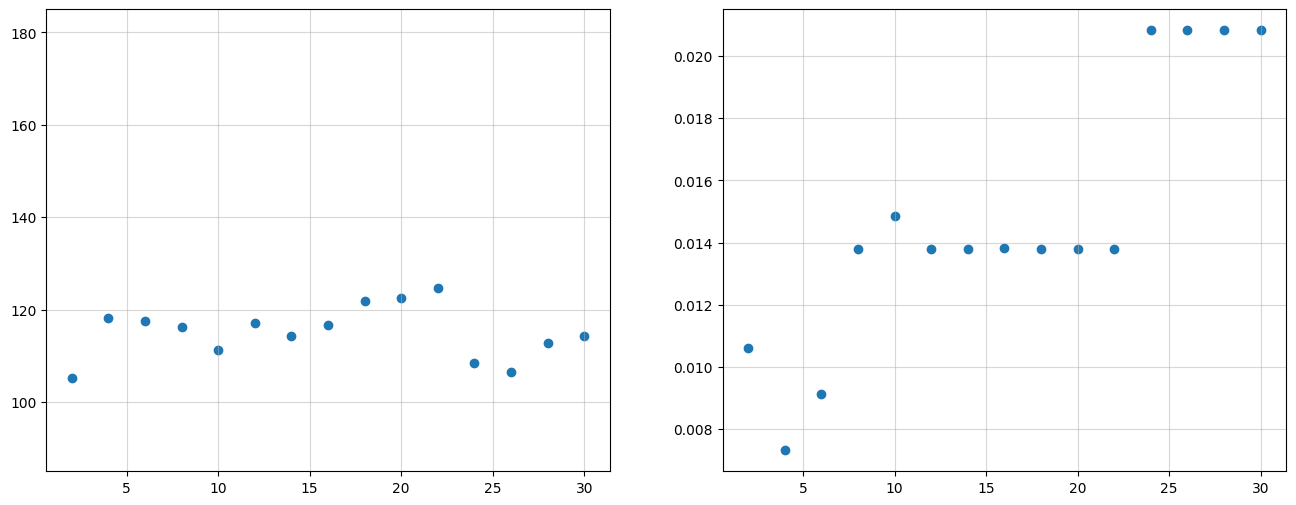

In [5]:
# plt.plot(single_core_angles[0])
fig, axs = plt.subplots(1, 2, figsize=(16, 6))
axs[0].grid(alpha=0.5)
axs[1].grid(alpha=0.5)
time = np.arange(2, 31, 2)

axs[0].scatter(time, np.rad2deg(angles[i]))
axs[1].scatter(time, delta[i])
axs[0].set_ylim(85, 185)
plt.show()


In [6]:
begin = 1
print(np.rad2deg(np.mean(angles[begin:])), np.rad2deg(np.std(angles[begin:], ddof=1)))

115.17621632243592 5.514476559079237


In [ ]:
# scales =        ['1.0', '1.1', '1.2', '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2.0', '2.1', '2.2', '2.3', '2.4', '2.5']
# scales = [str(f"{sc:.1f}") for sc in np.arange(1.0, 3.05, 0.1)]
# block_lengths = [2000 , 2000 , 2000 , 2000 , 2000 , 2000 , 2000 , 2000 , 2000 , 2000 , 2500 ]
# block_lengths = [2000 for _ in range(len(scales))]
# begins =        [0    , 1    , 0    , 1    , 1    , 1    , 1    , 1    , 1    , 4    , 0    ]
# begins = [1 for _ in range(11)]

plt.AutoLocatorfigure(figsize=(8, 6))
plt.grid(alpha=0.5)

mean_angles = []
std_angles = []

for i, sc in enumerate(scales.keys()):
    block_length = scales[sc][0]
    begin = scales[sc][1]

    # if sc == '0.9':
    if True:
        folder = f"/home/fluffymelon/PANDA_exp/scaling/production/calcite_decane_tip4p_sc_{sc}_offset_0.2"
        time, angles, delta = np.loadtxt(os.path.join(folder, f"angles_delta_block_length_{block_length}.txt"), skiprows=1, comments=["@", "#"], unpack=True)

        mean_angles.append(np.mean(angles[begin:]))
        std_angles.append(np.std(angles[begin:], ddof=1))

        # plt.scatter(time / 1_000, delta * 9, s=50, label=f"scale: {sc}")
        plt.scatter(time / 1_000, angles, s=50, label=f"scale: {sc}")

plt.title(f'Contact angle over time at different scale', fontsize=18)
plt.xlim(-1, 41)
plt.ylim(85, 195)
plt.xlabel('time, ns', fontsize=14)
plt.ylabel(r'$\theta$, deg', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='best', fontsize=14)

plt.show()

In [18]:
begin, end = 1, -1
# x = np.array(list(map(float, scales.keys())))[begin:end]
# y = np.array(mean_angles)[begin:end]
# weights = 1 / np.array(std_angles)[begin:end]
# x = np.array(list(map(float, scales.keys())))
x = np.array(list(map(float, scales_b)))[begin:end]
y = np.array(mean_angles)[begin:end]
weights = np.clip(1 / np.array(std_angles), 0, 1)[begin:end]


# def f(x, a, b, c, d):
#     return c * np.arctan(a * x + b) + d

# res = curve_fit(f, x, y, maxfev=100000)

# def f(x, a, b, c):
#     return a * (x + b)**3 + c

# res = curve_fit(f, x, y, p0=(-35.67453047,  -1.74912465, 136.46397976))
res = np.polyfit(x, y, 3)

In [16]:
def get_confidence_interval(data: np.array, alpha: float=0.05):
    c = stats.norm.ppf(1-alpha/2)
    n = len(data)
    mean_ = data.mean()
    c_sigma_n = c * np.std(data) / np.sqrt(n)
    return mean_ - c_sigma_n, mean_ + c_sigma_n

In [17]:
mean_angles = []
std_angles = []
ci_lower = []
ci_upper = []

for angle_array in angles:
    angle_array_sub = np.rad2deg(angle_array[4:])
    mean_angles.append(np.mean(angle_array_sub))
    std_angles.append(np.std(angle_array_sub, ddof=1))
    ci_l, ci_u = get_confidence_interval(angle_array_sub)
    ci_lower.append(ci_l)
    ci_upper.append(ci_u)


In [9]:
data = np.column_stack((np.array(list(map(float, scales.keys()))), mean_angles, std_angles))

In [11]:
data
np.savetxt("../angles_scale_decane.csv", data, delimiter=",", header="Scale,Angle,Angle_std")

In [14]:
data = np.loadtxt("../angles_scale_decane.csv", delimiter=",", skiprows=1)

mean_angles = []
std_angles = []
for sc, angle, std_angle in data:
    mean_angles.append(angle)
    std_angles.append(std_angle)

x_cross 2.239016576910467


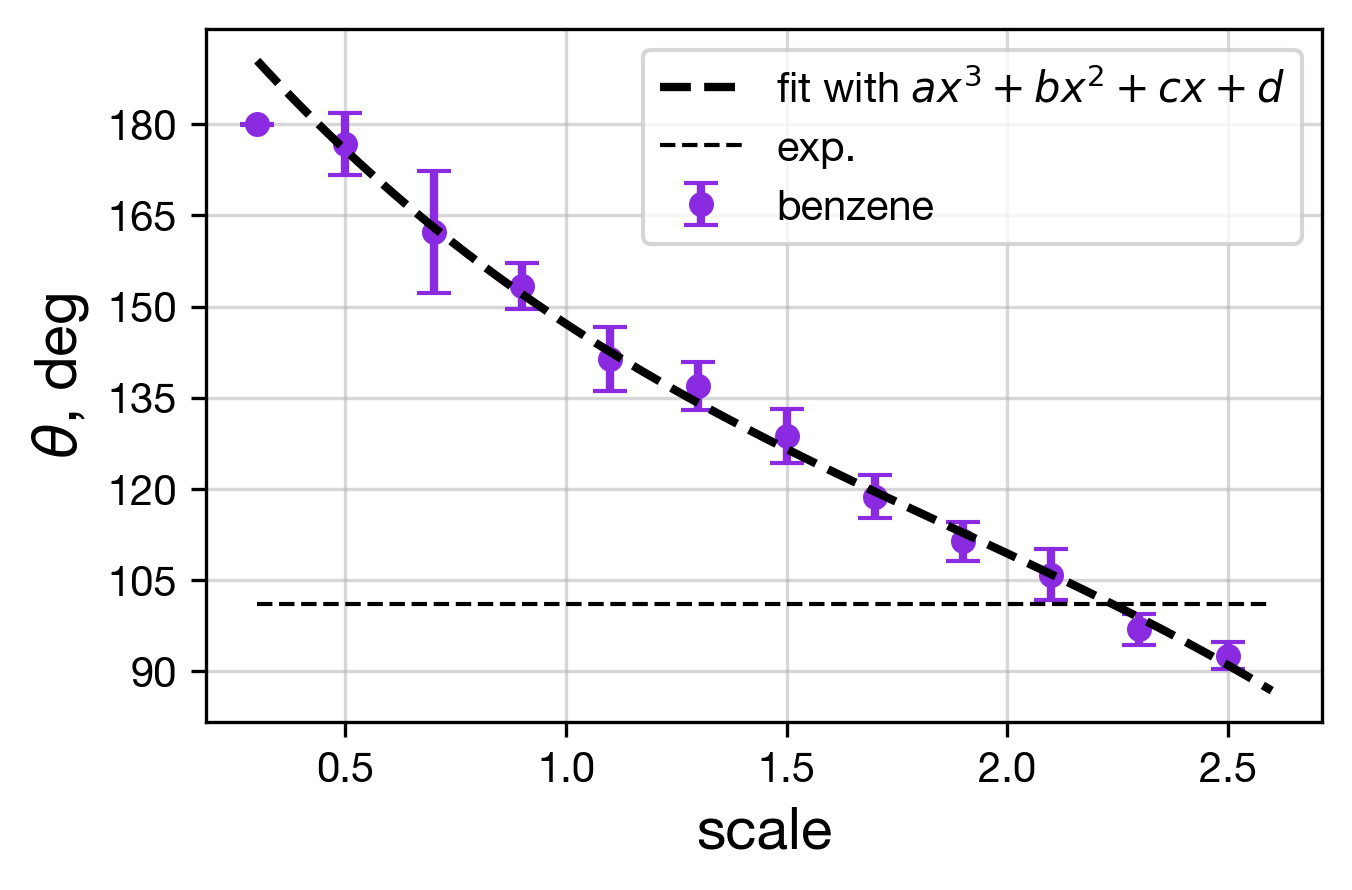

In [19]:
scale = 1.2
fig, ax = plt.subplots(figsize=(4*scale, 2.5*scale), dpi=300)
plt.grid(alpha=0.5)

# plt.errorbar(list(map(float, scales.keys()))[::2], mean_angles[::2], std_angles[::2], elinewidth=2, markersize=5, capsize=4, fmt='o', color='#DF2E38', zorder=10, label=r'$n$-decane')
plt.errorbar(list(map(float, scales_b))[::2], mean_angles[::2], std_angles[::2], elinewidth=2, markersize=5, capsize=4, fmt='o', color='#8A2BE2', zorder=10, label=r'benzene')

# x_ = np.linspace(0.5, 3, 100)
x_ = np.linspace(0.3, 2.6, 100)
y_fit = np.poly1d(res)(x_)
# y_fit = f(x_, *res[0])
plt.plot(x_, y_fit, label=r'fit with $ax^3+bx^2+cx+d$', color='black', linestyle='--', linewidth=2, zorder=11)

y_cross = 101
plt.plot(x_, [y_cross] * len(x_), label=r'exp.', color='black', linestyle='--', linewidth=1, zorder=12)

# Find intersection of fit curve and y=101
from scipy.optimize import brentq

def cubic_minus(x):
    return np.poly1d(res)(x) - y_cross

# Try to find intersection in the plotted x_ range
try:
    # Find all sign changes in the range to catch all intersections
    intersections = []
    for i in range(len(x_)-1):
        if (cubic_minus(x_[i]) * cubic_minus(x_[i+1]) < 0):
            x_int = brentq(cubic_minus, x_[i], x_[i+1])
            intersections.append(x_int)
    # Use the first intersection (or all, if you want to plot all)
    if intersections:
        x_cross = intersections[0]
        print('x_cross', x_cross)
        y_cross = y_cross
        # plt.scatter([x_cross], [y_cross], color='tab:green', s=100, zorder=20)
except Exception as e:
    print("No intersection found:", e)

# Add a big green point at a specific location (for example, at scale=1.5, fit value)
# big_point_x = 1.5
# big_point_y = np.poly1d(res)(big_point_x)
# plt.scatter([big_point_x], [big_point_y], color='limegreen', s=250, zorder=21, edgecolor='black', linewidth=2, label='Big green point')

# Labels and legend
plt.xlabel('scale', fontsize=14, fontproperties=helvetica_font)
plt.ylabel(r'$\theta$, deg', fontsize=14, fontproperties=helvetica_font)
plt.xticks(fontsize=14, fontproperties=helvetica_font)
plt.yticks(range(90, 181, 15), fontsize=14, fontproperties=helvetica_font)
plt.legend(loc='best', fontsize=14, prop=helvetica_font)

plt.show()

In [51]:
scale = 1.5
fig, ax = plt.subplots(figsize=(4*scale, 2.5*scale), dpi=300)
plt.grid(alpha=0.5)

# Plot mean values as scatter points
scatter_color = '#DF2E38'
scales_float = list(map(float, scales.keys()))
mean_angles_clipped = np.clip(mean_angles, 90, 180)
# std_angles = np.array(std_angles)
# ci_lower, ci_upper = get_confidence_interval(mean_angles_clipped)

plt.scatter(scales_float, mean_angles_clipped, color=scatter_color, zorder=10, label=r'$n$-decane', s=40)

# Calculate confidence interval and clip to [90, 180]
# ci_lower_clip = np.clip(ci_lower, 90, 180)
# ci_upper_clip = np.clip(ci_upper, 90, 180)

# Fill between for confidence interval, matching scatter color but with transparency
plt.fill_between(scales_float, ci_lower, ci_upper, color=scatter_color, alpha=0.2, zorder=9, label='Confidence Interval')

# plt.errorbar(list(map(float, scales.keys())), mean_angles, std_angles, elinewidth=2, markersize=5, capsize=4, fmt='o', color='#DF2E38', zorder=10, label=r'$n$-decane')

x_ = np.linspace(0.5, 3, 100)
# plt.plot(x_, f(x_, *res[0]), label=r'fit with tan')
# plt.plot(x_, f(x_, *res[0]), label=r'fit with $x^3$')
plt.plot(x_, np.poly1d(res)(x_), label=r'fit with $ax^3+bx^2+cx+d$', color='black', linestyle='--', linewidth=2, zorder=11)

# plt.title(r'Contact at different scaling for $\bf{calcite}$', fontsize=18, fontproperties=helvetica_font)
plt.xlabel('scale', fontsize=14, fontproperties=helvetica_font)
plt.ylabel(r'$\theta$, deg', fontsize=14, fontproperties=helvetica_font)
plt.xticks(fontsize=14, fontproperties=helvetica_font)
plt.yticks(range(90, 181, 15), fontsize=14, fontproperties=helvetica_font)
plt.legend(loc='best', fontsize=14, prop=helvetica_font)

plt.show()

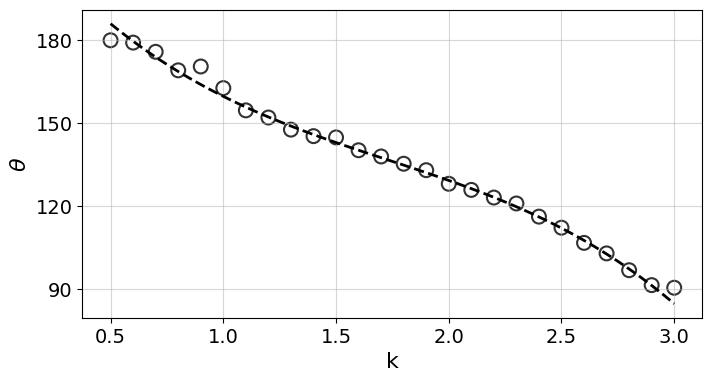

In [33]:
plt.figure(figsize=(8, 4))
plt.grid(alpha=0.5)

# plt.scatter(list(map(float, scales.keys())), mean_angles, s=100, marker='x', linewidth=1, color='#323232')
plt.scatter(list(map(float, scales.keys())), mean_angles, s=100, facecolors='none', edgecolors='#323232', linewidth=1.5)
# plt.errorbar(list(map(float, scales.keys())), mean_angles, std_angles, elinewidth=2, capsize=4, fmt='o')

x_ = np.linspace(0.5, 3, 100)
# plt.plot(x_, f(x_, *res[0]), label=r'fit with tan')
# plt.plot(x_, f(x_, *res[0]), label=r'fit with $x^3$')
plt.plot(x_, np.poly1d(res)(x_), linestyle='--', linewidth=2, color='#000000')

plt.xlabel('k', fontsize=16)
plt.ylabel(r'$\theta$', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(range(90, 181, 30), fontsize=14)

plt.show()

In [6]:
# Define the coefficients of the polynomial (from highest degree to lowest)
coeffs = res.copy()
coeffs[-1] -= 120

# Find the roots of the polynomial
roots = np.roots(coeffs)

print(roots)

[2.29620861+0.j         1.44612815+1.82121523j 1.44612815-1.82121523j]


In [103]:
arr = np.column_stack((np.array(list(map(float, scales.keys()))), mean_angles, std_angles))
header = "Scale,Angle,Angle_std"
np.savetxt("../data.csv", arr, delimiter=",", header=header)
# np.savetxt(args.output_file, output_data, delimiter="\t"comments=header)

In [ ]:
plt.figure(figsize=(8, 6))
plt.grid(alpha=0.5)

s = 50

begin1 = 0
mean1 = np.mean(angles_2_0_offset_0_5[begin1:])
std1 = get_real_std(angles_2_0_offset_0_5[begin1:])
plt.scatter(time_2_0_offset_0_5 / 1_000, angles_2_0_offset_0_5, s=s, color=cmap(1), label="offset: {:.1f}; angle {:.2f}±{:.2f}".format(0.5, mean1, std1))
plt.hlines(np.mean(angles_2_0_offset_0_5[begin1:]), 0, 40, color=cmap(1))

begin2 = 0
mean2 = np.mean(angles_2_0_offset_0_2[begin2:])
std2 = get_real_std(angles_2_0_offset_0_2[begin2:])
plt.scatter(time_2_0_offset_0_2 / 1_000, angles_2_0_offset_0_2, s=s, color=cmap(2), label="offset: {:.1f}; angle {:.2f}±{:.2f}".format(0.2, mean2, std2))
plt.hlines(np.mean(angles_2_0_offset_0_2[begin2:]), 0, 40, color=cmap(2))

begin3 = 1
mean3 = np.mean(angles_2_0[begin3:])
std3 = get_real_std(angles_2_0[begin3:])
plt.scatter(time_2_0 / 1_000, angles_2_0, s=s, color=cmap(3), label="offset: {:.1f}; angle {:.2f}±{:.2f}".format(0, mean3, std3))
plt.hlines(np.mean(angles_2_0[begin3:]), 0, 40, color=cmap(3))

plt.title(f'Contact angle over time at scale 2.0', fontsize=18)
plt.xlim(-1, 41)
plt.ylim(85, 145)
plt.xlabel('time, ns', fontsize=14)
plt.ylabel(r'$\theta$, deg', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='lower right', fontsize=14)

plt.show()

Chunk: 100%|██████████| 20/20 [02:39<00:00,  7.99s/it]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


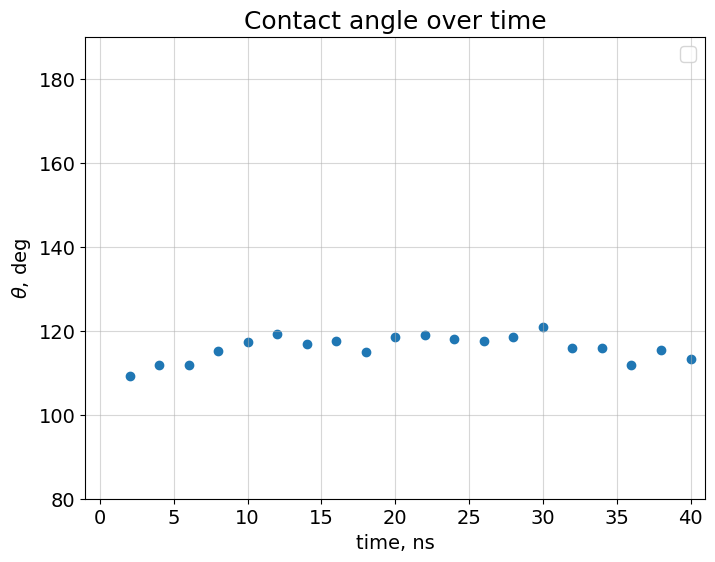

In [7]:
plt.figure(figsize=(8, 6))
plt.grid(alpha=0.5)

plt.scatter(time / 1000, angles)

plt.title(f'Contact angle over time', fontsize=18)
plt.xlim(-1, 41)
plt.ylim(80, 190)
plt.xlabel('time, ns', fontsize=14)
plt.ylabel(r'$\theta$, deg', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='best', fontsize=14)

plt.show()

In [46]:
'Молекулярное моделирование углов смачивания систем кальцит-углеводород-вода: универсальный подход к параметризации межатомных взаимодействий'.upper()

'МОЛЕКУЛЯРНОЕ МОДЕЛИРОВАНИЕ УГЛОВ СМАЧИВАНИЯ СИСТЕМ КАЛЬЦИТ-УГЛЕВОДОРОД-ВОДА: УНИВЕРСАЛЬНЫЙ ПОДХОД К ПАРАМЕТРИЗАЦИИ МЕЖАТОМНЫХ ВЗАИМОДЕЙСТВИЙ'